<a href="https://colab.research.google.com/github/RoyShibani/R_Programming_Courseworks/blob/main/GAMRashomonSet_Ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 5 different applications in this notebook:


*   Application 1: get different GAM models from the Rashomon set.
*   Application 2: get variable importance range.


*   Application 3: find the model that satisfies the monotonic constraints.
*  Application 4: find the users' preferred shape functions.


*   Application 5: explore sudden changes or abnormal patterns in the shape function.






In [ ]:
!git clone https://github.com/chudizhong/GAMsRashomonSet.git

Cloning into 'GAMsRashomonSet'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 43 (delta 17), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (43/43), 435.47 KiB | 6.60 MiB/s, done.
Resolving deltas: 100% (17/17), done.


In [ ]:
!ls GAMsRashomonSet/src

prepare_gam.py	rset_app.py  rset_opt.py  run_app.py  utils.py


In [ ]:
!ls GAMsRashomonSet/src/rset_opt.py

GAMsRashomonSet/src/rset_opt.py


In [ ]:
import sys
sys.path.append('/content/GAMsRashomonSet')


In [ ]:
!ls /content/GAMsRashomonSet/src


prepare_gam.py	rset_app.py  rset_opt.py  run_app.py  utils.py


In [ ]:
from src import rset_opt
print(dir(rset_opt))


['RSetOPT', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'combinations', 'nn', 'np', 'pd', 'pickle', 'time', 'torch', 'utils', 'warnings']


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import pickle
from matplotlib import pyplot as plt

In [ ]:

df = pd.read_csv('/content/heart_disease_health_indicators_BRFSS2015.csv')

In [ ]:
dname = "diabetes"
l0 = 0.001
l2 = 0.001
m = 1.01
filepath = "{}_{}_{}_{}.p".format(dname, l0, l2, m)
filepath

'diabetes_0.001_0.001_1.01.p'

In [ ]:
!pwd
!ls -lh


/content/GAMsRashomonSet
total 632K
drwxr-xr-x 2 root root 4.0K Feb  4 08:59 datasets
-rw-r--r-- 1 root root 239K Feb  4 09:05 diabetes_0.001_0.001_1.01.p
-rw-r--r-- 1 root root  994 Feb  4 08:59 example_find_rset.py
-rw-r--r-- 1 root root 370K Feb  4 08:59 example_rset_application.ipynb
-rw-r--r-- 1 root root 6.4K Feb  4 08:59 README.md
drwxr-xr-x 3 root root 4.0K Feb  4 08:59 src


In [ ]:
!grep -R "\.p\"" -n /content/GAMsRashomonSet


/content/GAMsRashomonSet/example_find_rset.py:10:filepath = "diabetes_0.001_0.001_1.01.p"
/content/GAMsRashomonSet/src/prepare_gam.py:92:    outfile = "{}_{}_{}_{}.p".format(dname, lamb0, lamb2, multiplier)
/content/GAMsRashomonSet/README.md:113:filepath = "diabetes_0.001_0.001_1.01.p"


In [ ]:
!sed -n '1,200p' /content/GAMsRashomonSet/src/prepare_gam.py


import numpy as np
import pandas as pd
import sys
import src.utils as utils
from sklearn.linear_model import LogisticRegression
import time
import pickle

import rpy2
from rpy2.robjects.packages import importr
from rpy2 import robjects
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()


def fit_fastsparse(X, y, tmp_lambda0=None, tmp_lambda2=None):
    """
    X, y: numpy arrays. X shape is n*(p+1) and y is either 1 or -1. 
    """
    base = importr('base')
    FastSparse = importr('FastSparse')
    np.random.seed(seed=3337)

    if tmp_lambda0 is None:  
        tmp_lambda0 = 1
    
    if tmp_lambda2 is None:
        tmp_lambda2 = 1e-5

    d = {'package.dependencies': 'package_dot_dependencies', 'package_dependencies': 'package_uscore_dependencies'}
    FastSparse = importr('FastSparse', robject_translations = d)

    fit = FastSparse.FastSparse_fit(X, y, loss="Logistic", penalty="L0L2", intercept=True, algorithm="CDPSI", maxSuppSize = 300, autoLambda=False, lambdaGrid

In [ ]:
%cd /content/GAMsRashomonSet
!python src/prepare_gam.py --dataset diabetes --lamb0 0.001 --lamb2 0.001 --multiplier 1.01


/content/GAMsRashomonSet
Traceback (most recent call last):
  File "/content/GAMsRashomonSet/src/prepare_gam.py", line 4, in <module>
    import src.utils as utils
ModuleNotFoundError: No module named 'src'


In [ ]:
!ls | grep diabetes_0.001_0.001_1.01.p


diabetes_0.001_0.001_1.01.p


In [ ]:
!python example_find_rset.py


----------- before optimization -----------
volume proportional to  tensor(3.1198e+43, dtype=torch.float64, grad_fn=<MulBackward0>)
0 tensor(0.2666, dtype=torch.float64, grad_fn=<AddBackward0>)
1 tensor(0.2050, dtype=torch.float64, grad_fn=<AddBackward0>)
2 tensor(0.1797, dtype=torch.float64, grad_fn=<AddBackward0>)
3 tensor(0.1803, dtype=torch.float64, grad_fn=<AddBackward0>)
4 tensor(0.1620, dtype=torch.float64, grad_fn=<AddBackward0>)
5 tensor(0.1516, dtype=torch.float64, grad_fn=<AddBackward0>)
6 tensor(0.1311, dtype=torch.float64, grad_fn=<AddBackward0>)
7 tensor(0.1095, dtype=torch.float64, grad_fn=<AddBackward0>)
8 tensor(0.1171, dtype=torch.float64, grad_fn=<AddBackward0>)
9 tensor(0.0896, dtype=torch.float64, grad_fn=<AddBackward0>)
10 tensor(0.0993, dtype=torch.float64, grad_fn=<AddBackward0>)
11 tensor(0.0874, dtype=torch.float64, grad_fn=<AddBackward0>)
12 tensor(0.0797, dtype=torch.float64, grad_fn=<AddBackward0>)
13 tensor(0.0868, dtype=torch.float64, grad_fn=<AddBackward

In [ ]:
from src.rset_opt import RSetOPT
model = RSetOPT("diabetes_0.001_0.001_1.01.p")


In [ ]:
import numpy as np
import pandas as pd
import pickle
from src.rset_opt import *

filepath = "diabetes_0.001_0.001_1.01.p"

model = RSetOPT(filepath)
model.finetune_ellipsoid()
model.get_precision()
H_opt = model.get_normalized_H()
w_opt = model.w_orig

# store optimized hessian and w to the file
model.update_file(H_opt, w_opt)

----------- before optimization -----------
volume proportional to  tensor(3.1198e+43, dtype=torch.float64, grad_fn=<MulBackward0>)
0 tensor(0.2359, dtype=torch.float64, grad_fn=<AddBackward0>)
1 tensor(0.2067, dtype=torch.float64, grad_fn=<AddBackward0>)
2 tensor(0.2138, dtype=torch.float64, grad_fn=<AddBackward0>)
3 tensor(0.1462, dtype=torch.float64, grad_fn=<AddBackward0>)
4 tensor(0.1689, dtype=torch.float64, grad_fn=<AddBackward0>)
5 tensor(0.1372, dtype=torch.float64, grad_fn=<AddBackward0>)
6 tensor(0.1099, dtype=torch.float64, grad_fn=<AddBackward0>)
7 tensor(0.1124, dtype=torch.float64, grad_fn=<AddBackward0>)
8 tensor(0.0972, dtype=torch.float64, grad_fn=<AddBackward0>)
9 tensor(0.0913, dtype=torch.float64, grad_fn=<AddBackward0>)
10 tensor(0.0884, dtype=torch.float64, grad_fn=<AddBackward0>)
11 tensor(0.0897, dtype=torch.float64, grad_fn=<AddBackward0>)
12 tensor(0.0935, dtype=torch.float64, grad_fn=<AddBackward0>)
13 tensor(0.0767, dtype=torch.float64, grad_fn=<AddBackward

In [ ]:
!grep -R "def get_models_from_rset" -n /content/GAMsRashomonSet


/content/GAMsRashomonSet/src/run_app.py:14:def get_models_from_rset(filepath, n_samples=100, plot_shape=False):


# Application 1: get different models from the Rashomon set.

In [ ]:
from src.run_app import get_models_from_rset
w_samples = get_models_from_rset(
    filepath,
    n_samples=100,
    plot_shape=True
)


NameError: name 'filepath' is not defined

In [ ]:
!cp /content/GAMsRashomonSet/src/run_app.py /content/GAMsRashomonSet/src/run_app.py.bak


In [ ]:
!sed -i 's/prob.solve()/prob.solve(solver=cp.SCS, verbose=True)/g' /content/GAMsRashomonSet/src/run_app.py


In [ ]:
import importlib
import src.run_app
importlib.reload(src.run_app)


<module 'src.run_app' from '/content/GAMsRashomonSet/src/run_app.py'>

# Application 2: get variable importance range.

(CVXPY) Jan 20 07:07:09 AM: Your problem has 36 variables, 35 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:09 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:09 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:09 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:09 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:09 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:09 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:09 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:09 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:09 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:09 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:09 AM: Finished problem compilation (took 3.764

Pregnancies
----------------------variable importance Minus----------------------
                                     CVXPY                                     
                                     v1.6.7                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 73, constraints m: 145
co

(CVXPY) Jan 20 07:07:09 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:09 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:09 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:09 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:09 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:09 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:09 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:09 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:09 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:09 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:09 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:09 AM: Finished problem compilation (took 4.660e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 34
	  l: linear vars: 3
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize:

(CVXPY) Jan 20 07:07:09 AM: Finished problem compilation (took 4.116e-02 seconds).
(CVXPY) Jan 20 07:07:09 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:09 AM: Problem status: optimal
(CVXPY) Jan 20 07:07:09 AM: Optimal value: 2.464e-01
(CVXPY) Jan 20 07:07:09 AM: Compilation took 4.116e-02 seconds
(CVXPY) Jan 20 07:07:09 AM: Solver (including time spent in interface) took 4.995e-03 seconds
(CVXPY) Jan 20 07:07:09 AM: Your problem has 36 variables, 3 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:09 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:09 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:09 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:09 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:09 AM: Compiling problem (target so

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 34
	  l: linear vars: 3
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:10 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:10 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:10 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:10 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:10 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:10 AM: Finished problem compilation (took 2.172e-02 seconds).
(CVXPY) Jan 20 07:07:10 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:10 AM: Problem status: optimal
(CVXPY) Jan 20 07:07:10 AM: Optimal value: 1.893e+00
(CVXPY) Jan 20 07:07:10 AM: Compilation took 2.172e-02 seconds
(CVXPY) Jan 20 07:07:10 AM: Solver (including time spent in interface) took 8.192e-03 seconds


-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 41
cones: 	  l: linear vars: 3
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1301, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
--------

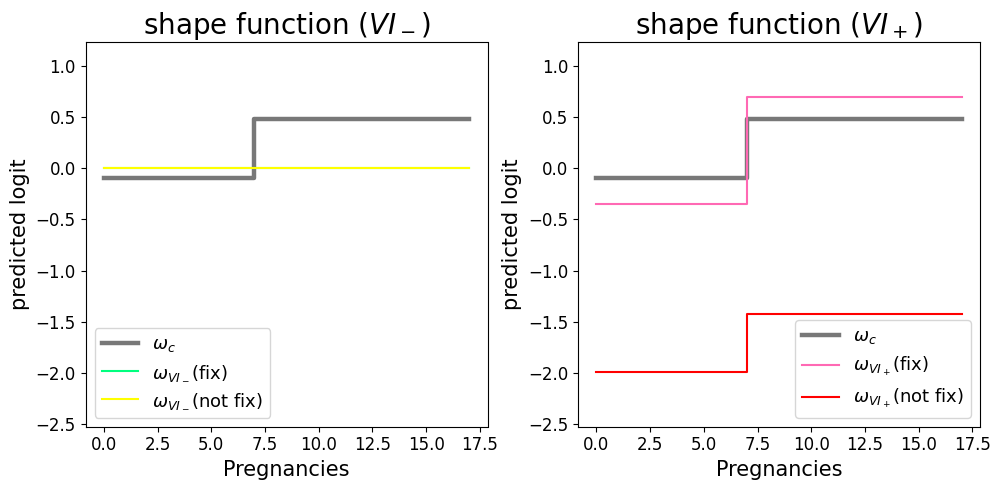

(CVXPY) Jan 20 07:07:10 AM: Your problem has 36 variables, 32 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:10 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:10 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:10 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:10 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:10 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:10 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:10 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:10 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:10 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:10 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:10 AM: Finished problem compilation (took 4.347

Glucose
----------------------variable importance Minus----------------------
                                     CVXPY                                     
                                     v1.6.7                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 73, constraints m: 142
cones:

(CVXPY) Jan 20 07:07:11 AM: Finished problem compilation (took 3.136e-01 seconds).
(CVXPY) Jan 20 07:07:11 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:11 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:11 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:11 AM: Compilation took 3.136e-01 seconds
(CVXPY) Jan 20 07:07:11 AM: Solver (including time spent in interface) took 5.373e-03 seconds
/content/GAMsRashomonSet/src/rset_app.py:352: UserWarning: solution is None
  warnings.warn("solution is None")
(CVXPY) Jan 20 07:07:11 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:11 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:11 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:11 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:11 AM: Your prob

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 31
	  l: linear vars: 6
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:11 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:11 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:11 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:11 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:11 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:11 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:11 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:11 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:11 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:11 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:11 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:11 AM: Finished problem compilation (took 5.313e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 31
	  l: linear vars: 6
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize:

(CVXPY) Jan 20 07:07:11 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:11 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:11 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:11 AM: Finished problem compilation (took 4.709e-02 seconds).
(CVXPY) Jan 20 07:07:11 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:11 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:11 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:11 AM: Compilation took 4.709e-02 seconds
(CVXPY) Jan 20 07:07:11 AM: Solver (including time spent in interface) took 4.231e-03 seconds
(CVXPY) Jan 20 07:07:11 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:11 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:11 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:11 AM: CVXPY will first compile your problem; then, it will invoke a numerical

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 31
	  l: linear vars: 6
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:11 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:11 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:11 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:11 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:11 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:11 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:11 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:11 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:11 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:11 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:11 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:11 AM: Finished problem compilation (took 4.892e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 31
	  l: linear vars: 6
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize:

(CVXPY) Jan 20 07:07:11 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:11 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:11 AM: Finished problem compilation (took 5.484e-02 seconds).
(CVXPY) Jan 20 07:07:11 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:11 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:11 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:11 AM: Compilation took 5.484e-02 seconds
(CVXPY) Jan 20 07:07:11 AM: Solver (including time spent in interface) took 5.075e-03 seconds
(CVXPY) Jan 20 07:07:11 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:12 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:12 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:12 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:12 AM: Your

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 31
	  l: linear vars: 6
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:12 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:12 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:12 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:12 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:12 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:12 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:12 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:12 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:12 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:12 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:12 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:12 AM: Applying redu

                                     CVXPY                                     
                                     v1.6.7                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 31
	  l: linear vars: 6
	  q: soc vars: 38

(CVXPY) Jan 20 07:07:12 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:12 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:12 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:12 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:12 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:12 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:12 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:12 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:12 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:12 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:12 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:12 AM: Finished problem compilation (took 5.485e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 31
	  l: linear vars: 6
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize:

(CVXPY) Jan 20 07:07:12 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:12 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:12 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:12 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:12 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:12 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:12 AM: Finished problem compilation (took 4.994e-02 seconds).
(CVXPY) Jan 20 07:07:12 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:12 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:12 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:12 AM: Compilation took 4.994e-02 seconds
(CVXPY) Jan 20 07:07:12 AM: Solver (including time spent in interface) took 1.422e-02 seconds
(CVXPY) Jan 20 07:07:12 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:12 AM: It is compliant with the following grammars: DCP, D

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 31
	  l: linear vars: 6
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:12 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:12 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:12 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:12 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:12 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:12 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:12 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:12 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:12 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:12 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:12 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:12 AM: Applying redu

                                     CVXPY                                     
                                     v1.6.7                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 31
	  l: linear vars: 6
	  q: soc vars: 38

(CVXPY) Jan 20 07:07:13 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:13 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:13 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:13 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:13 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:13 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:13 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:13 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:13 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:13 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:13 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:13 AM: Finished problem compilation (took 4.653e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 31
	  l: linear vars: 6
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize:

(CVXPY) Jan 20 07:07:13 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:13 AM: Finished problem compilation (took 4.676e-02 seconds).
(CVXPY) Jan 20 07:07:13 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:13 AM: Problem status: optimal
(CVXPY) Jan 20 07:07:13 AM: Optimal value: 1.386e+00
(CVXPY) Jan 20 07:07:13 AM: Compilation took 4.676e-02 seconds
(CVXPY) Jan 20 07:07:13 AM: Solver (including time spent in interface) took 6.126e-03 seconds
(CVXPY) Jan 20 07:07:13 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:13 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:13 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:13 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:13 AM: Your problem is compiled with the CPP canonicalization backend.
(CVX

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 31
	  l: linear vars: 6
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:13 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:13 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:13 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:13 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:13 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:13 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:13 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:13 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:13 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:13 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:13 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:13 AM: Finished problem compilation (took 6.241e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 31
	  l: linear vars: 6
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize:

(CVXPY) Jan 20 07:07:13 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:13 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:13 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:13 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:13 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:13 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:13 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:13 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:13 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:13 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:13 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:13 AM: Finished problem compilation (took 5.112e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 31
	  l: linear vars: 6
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize:

(CVXPY) Jan 20 07:07:13 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:13 AM: Finished problem compilation (took 5.145e-02 seconds).
(CVXPY) Jan 20 07:07:13 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:13 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:13 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:13 AM: Compilation took 5.145e-02 seconds
(CVXPY) Jan 20 07:07:13 AM: Solver (including time spent in interface) took 5.896e-03 seconds
(CVXPY) Jan 20 07:07:14 AM: Your problem has 36 variables, 6 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:14 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:14 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:14 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:14 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY)

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 31
	  l: linear vars: 6
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:14 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:14 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:14 AM: Compilation took 2.370e-02 seconds
(CVXPY) Jan 20 07:07:14 AM: Solver (including time spent in interface) took 3.360e-01 seconds


 13250| 3.50e+10  1.16e+10  2.09e+16  1.05e+16  1.00e-01  1.40e-01 
 13500| 3.52e+10  1.17e+10  2.09e+16  1.05e+16  1.00e-01  1.43e-01 
 13750| 3.63e+10  1.20e+10  2.09e+16  1.05e+16  1.00e-01  1.45e-01 
 14000| 3.71e+10  1.23e+10  2.09e+16  1.05e+16  1.00e-01  1.48e-01 
 14250| 3.83e+10  1.27e+10  2.09e+16  1.04e+16  1.00e-01  1.50e-01 
 14500| 3.89e+10  1.29e+10  2.09e+16  1.04e+16  1.00e-01  1.53e-01 
 14750| 9.13e+10  1.23e+10  2.10e+16  1.05e+16  1.00e-01  1.56e-01 
 15000| 4.12e+10  1.36e+10  2.09e+16  1.04e+16  1.00e-01  1.58e-01 
 15250| 4.23e+10  1.40e+10  2.09e+16  1.04e+16  1.00e-01  1.61e-01 
 15500| 4.38e+10  1.45e+10  2.09e+16  1.04e+16  1.00e-01  1.63e-01 
 15750| 4.53e+10  1.50e+10  2.09e+16  1.04e+16  1.00e-01  1.66e-01 
 16000| 4.71e+10  1.56e+10  2.09e+16  1.04e+16  1.00e-01  1.68e-01 
 16250| 4.88e+10  1.62e+10  2.09e+16  1.04e+16  1.00e-01  1.71e-01 
 16500| 5.09e+10  1.68e+10  2.09e+16  1.04e+16  1.00e-01  1.74e-01 
 16750| 5.33e+10  1.76e+10  2.09e+16  1.04e+16  

(CVXPY) Jan 20 07:07:14 AM: Your problem has 36 variables, 6 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:14 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:14 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:14 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:14 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:14 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:14 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:14 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:14 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:14 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:14 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:14 AM: Applying reduc

                                     CVXPY                                     
                                     v1.6.7                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 44
cones: 	  l: linear vars: 6
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, 

(CVXPY) Jan 20 07:07:14 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:14 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:14 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:14 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:14 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:14 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:14 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:14 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:14 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:14 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:14 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:14 AM: Finished problem compilation (took 3.127e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 44
cones: 	  l: linear vars: 6
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_loo

(CVXPY) Jan 20 07:07:14 AM: Finished problem compilation (took 2.654e-02 seconds).
(CVXPY) Jan 20 07:07:14 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:14 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:14 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:14 AM: Compilation took 2.654e-02 seconds
(CVXPY) Jan 20 07:07:14 AM: Solver (including time spent in interface) took 3.005e-03 seconds
(CVXPY) Jan 20 07:07:14 AM: Your problem has 36 variables, 6 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:14 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:14 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:14 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:14 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:14 AM: Compiling problem (target solv

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 44
cones: 	  l: linear vars: 6
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1304, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
--------

(CVXPY) Jan 20 07:07:15 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:15 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:15 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:15 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:15 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:15 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:15 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:15 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:15 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:15 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:15 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:15 AM: Finished problem compilation (took 2.377e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 44
cones: 	  l: linear vars: 6
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_loo

(CVXPY) Jan 20 07:07:15 AM: Finished problem compilation (took 2.407e-02 seconds).
(CVXPY) Jan 20 07:07:15 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:15 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:15 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:15 AM: Compilation took 2.407e-02 seconds
(CVXPY) Jan 20 07:07:15 AM: Solver (including time spent in interface) took 3.259e-03 seconds
(CVXPY) Jan 20 07:07:15 AM: Your problem has 36 variables, 6 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:15 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:15 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:15 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:15 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:15 AM: Compiling problem (target solv

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 44
cones: 	  l: linear vars: 6
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1304, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
--------

(CVXPY) Jan 20 07:07:15 AM: Finished problem compilation (took 3.452e-02 seconds).
(CVXPY) Jan 20 07:07:15 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:15 AM: Problem status: optimal
(CVXPY) Jan 20 07:07:15 AM: Optimal value: 2.083e+00
(CVXPY) Jan 20 07:07:15 AM: Compilation took 3.452e-02 seconds
(CVXPY) Jan 20 07:07:15 AM: Solver (including time spent in interface) took 8.001e-03 seconds
(CVXPY) Jan 20 07:07:15 AM: Your problem has 36 variables, 6 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:15 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:15 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:15 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:15 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:15 AM: Compiling problem (target so

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 44
cones: 	  l: linear vars: 6
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1304, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
--------

(CVXPY) Jan 20 07:07:15 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:15 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:15 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:15 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:15 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:15 AM: Finished problem compilation (took 2.745e-02 seconds).
(CVXPY) Jan 20 07:07:15 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:15 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:15 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:15 AM: Compilation took 2.745e-02 seconds
(CVXPY) Jan 20 07:07:15 AM: Solver (including time spent in interface) took 2.830e-03 seconds
(CVXPY) Jan 20 07:07:15 AM: Your problem has 36 variables, 6 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:15 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:15 AM: (If you need to solve this problem multiple times, but with different data, consider us

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 44
cones: 	  l: linear vars: 6
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1304, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
--------

(CVXPY) Jan 20 07:07:15 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:15 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:15 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:15 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:15 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:15 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:15 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:15 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:15 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:15 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:15 AM: Finished problem compilation (took 2.838e-02 seconds).
(CVXPY) Jan 20 07:07:15 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 

-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 44
cones: 	  l: linear vars: 6
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_loo

(CVXPY) Jan 20 07:07:16 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:16 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:16 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:16 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:16 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:16 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:16 AM: Finished problem compilation (took 2.361e-02 seconds).
(CVXPY) Jan 20 07:07:16 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:16 AM: Problem status: optimal
(CVXPY) Jan 20 07:07:16 AM: Optimal value: 1.525e+00
(CVXPY) Jan 20 07:07:16 AM: Compilation took 2.361e-02 seconds
(CVXPY) Jan 20 07:07:16 AM: Solver (including time spent in interface) took 3.866e-03 seconds
(CVXPY) Jan 20 07:07:16 AM: Your problem has 36 variables, 6 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:16 AM: It is compliant with the following grammars: DCP, 

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 44
cones: 	  l: linear vars: 6
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1304, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
--------

(CVXPY) Jan 20 07:07:16 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:16 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:16 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:16 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:16 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:16 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:16 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:16 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:16 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:16 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:16 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:16 AM: Finished problem compilation (took 2.134e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 44
cones: 	  l: linear vars: 6
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_loo

(CVXPY) Jan 20 07:07:16 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:16 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:16 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:16 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:16 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:16 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:16 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:16 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:16 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:16 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:16 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:16 AM: Finished problem compilation (took 2.215e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 44
cones: 	  l: linear vars: 6
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_loo

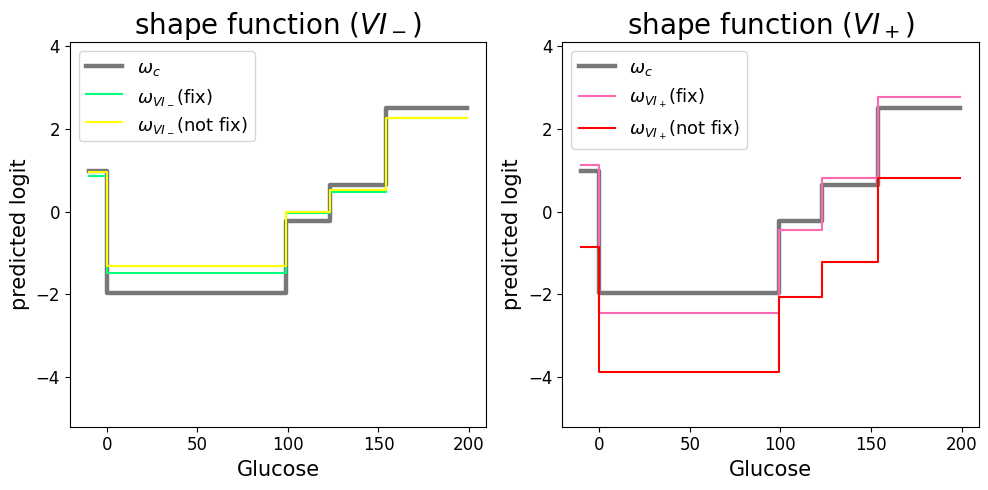

(CVXPY) Jan 20 07:07:17 AM: Your problem has 36 variables, 32 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:17 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:17 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:17 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:17 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:17 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:17 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:17 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:17 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:17 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:17 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:17 AM: Finished problem compilation (took 4.266

BloodPressure
----------------------variable importance Minus----------------------
                                     CVXPY                                     
                                     v1.6.7                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 73, constraints m: 142


(CVXPY) Jan 20 07:07:17 AM: Finished problem compilation (took 4.790e-02 seconds).
(CVXPY) Jan 20 07:07:17 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:17 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:17 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:17 AM: Compilation took 4.790e-02 seconds
(CVXPY) Jan 20 07:07:17 AM: Solver (including time spent in interface) took 8.875e-03 seconds
(CVXPY) Jan 20 07:07:17 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:17 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:17 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:17 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:17 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:17 AM: Compiling problem (target sol

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 31
	  l: linear vars: 6
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:17 AM: Finished problem compilation (took 4.842e-02 seconds).
(CVXPY) Jan 20 07:07:17 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:17 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:17 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:17 AM: Compilation took 4.842e-02 seconds
(CVXPY) Jan 20 07:07:17 AM: Solver (including time spent in interface) took 8.664e-03 seconds
(CVXPY) Jan 20 07:07:17 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:17 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:17 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:17 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:17 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:17 AM: Compiling problem (target sol

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 31
	  l: linear vars: 6
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:17 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:17 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:17 AM: Compilation took 4.774e-02 seconds
(CVXPY) Jan 20 07:07:17 AM: Solver (including time spent in interface) took 2.037e-02 seconds
(CVXPY) Jan 20 07:07:17 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:17 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:17 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:17 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:17 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:17 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:17 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:17 AM

   250| 7.37e-02  3.34e-04  1.79e-01 -3.40e-01  3.87e-01  5.55e-03 
   500| 4.92e-02  6.89e-04  3.26e-01 -1.79e-01  1.24e+00  8.52e-03 
   750| 4.65e-02  9.22e-04  5.57e-01 -4.09e-02  1.24e+00  1.15e-02 
  1000| 4.57e-02  1.54e-03  1.01e+00  2.00e-01  1.24e+00  1.45e-02 
  1250| 4.54e-02  4.06e-03  2.79e+00  1.10e+00  1.24e+00  1.73e-02 
  1425| 2.56e+10  8.99e+08  1.39e+18  6.95e+17  1.24e+00  1.93e-02 
------------------------------------------------------------------
status:  infeasible
timings: total: 1.93e-02s = setup: 7.05e-04s + solve: 1.86e-02s
	 lin-sys: 1.47e-02s, cones: 8.11e-04s, accel: 3.99e-04s
------------------------------------------------------------------
objective = inf
------------------------------------------------------------------
-------------------------------------------------------------------------------
                                    Summary                                    
--------------------------------------------------------------------------

(CVXPY) Jan 20 07:07:17 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:18 AM: Finished problem compilation (took 6.994e-02 seconds).
(CVXPY) Jan 20 07:07:18 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:18 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:18 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:18 AM: Compilation took 6.994e-02 seconds
(CVXPY) Jan 20 07:07:18 AM: Solver (including time spent in interface) took 1.904e-02 seconds
(CVXPY) Jan 20 07:07:18 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:18 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:18 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:18 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:18 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 31
	  l: linear vars: 6
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:18 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:18 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:18 AM: Compilation took 4.438e-02 seconds
(CVXPY) Jan 20 07:07:18 AM: Solver (including time spent in interface) took 9.056e-03 seconds
(CVXPY) Jan 20 07:07:18 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:18 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:18 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:18 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:18 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:18 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:18 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:18 AM

   525| 6.69e+08  4.47e+07  5.03e+18  2.51e+18  1.49e+00  8.32e-03 
------------------------------------------------------------------
status:  infeasible
timings: total: 8.33e-03s = setup: 8.45e-04s + solve: 7.48e-03s
	 lin-sys: 5.80e-03s, cones: 2.52e-04s, accel: 1.32e-04s
------------------------------------------------------------------
objective = inf
------------------------------------------------------------------
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
                                     CVXPY                                     
                                     v1.6.7                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
--------------

(CVXPY) Jan 20 07:07:18 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:18 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:18 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:18 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:18 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:18 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:18 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:18 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:18 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:18 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:18 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:18 AM: Applying redu

-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 31
	  l: linear vars: 6
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize:

(CVXPY) Jan 20 07:07:18 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:18 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:18 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:18 AM: Finished problem compilation (took 4.462e-02 seconds).
(CVXPY) Jan 20 07:07:18 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:18 AM: Problem status: optimal
(CVXPY) Jan 20 07:07:18 AM: Optimal value: 4.808e-01
(CVXPY) Jan 20 07:07:18 AM: Compilation took 4.462e-02 seconds
(CVXPY) Jan 20 07:07:18 AM: Solver (including time spent in interface) took 5.311e-03 seconds
(CVXPY) Jan 20 07:07:18 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:18 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:18 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:18 AM: CVXPY will first compile your problem; then, it will invoke a numeric

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 31
	  l: linear vars: 6
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:18 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:18 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:18 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:18 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:18 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:18 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:18 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:18 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:18 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:18 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:18 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:18 AM: Finished problem compilation (took 4.499e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 31
	  l: linear vars: 6
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize:

(CVXPY) Jan 20 07:07:19 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:19 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:19 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:19 AM: Finished problem compilation (took 6.008e-02 seconds).
(CVXPY) Jan 20 07:07:19 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:19 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:19 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:19 AM: Compilation took 6.008e-02 seconds
(CVXPY) Jan 20 07:07:19 AM: Solver (including time spent in interface) took 9.006e-03 seconds
(CVXPY) Jan 20 07:07:19 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:19 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:19 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:19 AM: CVXPY will first compile your problem; then, it will invoke a numerical

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 31
	  l: linear vars: 6
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:19 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:19 AM: Finished problem compilation (took 5.640e-02 seconds).
(CVXPY) Jan 20 07:07:19 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:19 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:19 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:19 AM: Compilation took 5.640e-02 seconds
(CVXPY) Jan 20 07:07:19 AM: Solver (including time spent in interface) took 1.142e-02 seconds
(CVXPY) Jan 20 07:07:19 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:19 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:19 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:19 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:19 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 31
	  l: linear vars: 6
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:19 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:19 AM: Finished problem compilation (took 7.237e-02 seconds).
(CVXPY) Jan 20 07:07:19 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:19 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:19 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:19 AM: Compilation took 7.237e-02 seconds
(CVXPY) Jan 20 07:07:19 AM: Solver (including time spent in interface) took 1.163e-02 seconds
(CVXPY) Jan 20 07:07:19 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:19 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:19 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:19 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:19 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 31
	  l: linear vars: 6
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:19 AM: Problem status: optimal
(CVXPY) Jan 20 07:07:19 AM: Optimal value: 2.787e-01
(CVXPY) Jan 20 07:07:19 AM: Compilation took 7.603e-02 seconds
(CVXPY) Jan 20 07:07:19 AM: Solver (including time spent in interface) took 1.873e-01 seconds
(CVXPY) Jan 20 07:07:19 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:19 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:19 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:19 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:19 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:19 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:19 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:19 

  3500| 1.54e-03  3.36e-05  9.34e-03 -2.85e-01  1.20e+00  5.90e-02 
  3750| 4.33e-04  2.55e-03  8.80e-04 -2.78e-01  1.20e+00  6.19e-02 
  4000| 1.30e-03  2.91e-05  8.21e-03 -2.84e-01  1.20e+00  6.47e-02 
  4250| 1.20e-03  2.71e-05  7.71e-03 -2.84e-01  1.20e+00  6.76e-02 
  4500| 1.12e-03  2.54e-05  7.26e-03 -2.83e-01  1.20e+00  7.11e-02 
  4750| 1.04e-03  2.39e-05  6.85e-03 -2.83e-01  1.20e+00  7.52e-02 
  5000| 9.68e-04  2.24e-05  6.47e-03 -2.83e-01  1.20e+00  7.87e-02 
  5250| 9.04e-04  2.11e-05  6.11e-03 -2.82e-01  1.20e+00  8.25e-02 
  5500| 8.46e-04  1.99e-05  5.79e-03 -2.82e-01  1.20e+00  8.53e-02 
  5750| 7.93e-04  1.88e-05  5.48e-03 -2.82e-01  1.20e+00  8.81e-02 
  6000| 7.44e-04  1.78e-05  5.20e-03 -2.82e-01  1.20e+00  9.11e-02 
  6250| 7.00e-04  1.68e-05  4.93e-03 -2.82e-01  1.20e+00  9.51e-02 
  6500| 2.15e-04  1.27e-03  4.44e-04 -2.79e-01  1.20e+00  9.80e-02 
  6750| 6.21e-04  1.51e-05  4.45e-03 -2.81e-01  1.20e+00  1.01e-01 
  7000| 5.85e-04  1.43e-05  4.23e-03 -2.81e-01  

(CVXPY) Jan 20 07:07:20 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:20 AM: Finished problem compilation (took 5.559e-02 seconds).
(CVXPY) Jan 20 07:07:20 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:20 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:20 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:20 AM: Compilation took 5.559e-02 seconds
(CVXPY) Jan 20 07:07:20 AM: Solver (including time spent in interface) took 7.081e-03 seconds
(CVXPY) Jan 20 07:07:20 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:20 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:20 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:20 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:20 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 31
	  l: linear vars: 6
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:20 AM: Finished problem compilation (took 6.337e-02 seconds).
(CVXPY) Jan 20 07:07:20 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:20 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:20 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:20 AM: Compilation took 6.337e-02 seconds
(CVXPY) Jan 20 07:07:20 AM: Solver (including time spent in interface) took 7.744e-03 seconds
(CVXPY) Jan 20 07:07:20 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:20 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:20 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:20 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:20 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:20 AM: Compiling problem (target sol

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 31
	  l: linear vars: 6
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:20 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:20 AM: Finished problem compilation (took 5.961e-02 seconds).
(CVXPY) Jan 20 07:07:20 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:20 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:20 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:20 AM: Compilation took 5.961e-02 seconds
(CVXPY) Jan 20 07:07:20 AM: Solver (including time spent in interface) took 1.112e-02 seconds
(CVXPY) Jan 20 07:07:20 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:20 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:20 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:20 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:20 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 31
	  l: linear vars: 6
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:21 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:21 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:21 AM: Compilation took 5.788e-02 seconds
(CVXPY) Jan 20 07:07:21 AM: Solver (including time spent in interface) took 5.276e-01 seconds
(CVXPY) Jan 20 07:07:21 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:21 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:21 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:21 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:21 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:21 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:21 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:21 AM

 35250| 9.43e-04  7.73e-04  2.68e-01 -8.96e-02  1.19e+00  4.98e-01 
 35500| 9.37e-04  9.13e-04  3.16e-01 -6.52e-02  1.19e+00  5.03e-01 
 35750| 9.30e-04  1.12e-03  3.87e-01 -3.00e-02  1.19e+00  5.08e-01 
 36000| 9.21e-04  1.43e-03  4.97e-01  2.53e-02  1.19e+00  5.11e-01 
 36250| 9.08e-04  2.00e-03  6.95e-01  1.25e-01  1.19e+00  5.15e-01 
 36500| 8.91e-04  3.33e-03  1.15e+00  3.55e-01  1.19e+00  5.20e-01 
 36750| 1.14e-03  9.88e-03  3.43e+00  1.49e+00  1.19e+00  5.24e-01 
 36900| 1.12e+09  7.65e+07  2.89e+16  1.44e+16  1.19e+00  5.27e-01 
------------------------------------------------------------------
status:  infeasible
timings: total: 5.27e-01s = setup: 7.93e-04s + solve: 5.26e-01s
	 lin-sys: 4.19e-01s, cones: 2.46e-02s, accel: 1.33e-02s
------------------------------------------------------------------
objective = inf
------------------------------------------------------------------
-------------------------------------------------------------------------------
                  

(CVXPY) Jan 20 07:07:21 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:21 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:21 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:21 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:21 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:21 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:21 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:21 AM: Finished problem compilation (took 5.639e-02 seconds).
(CVXPY) Jan 20 07:07:21 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:21 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:21 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:21 AM: Compilation took 5.639e-02 seconds
(CVXPY) Jan 20 07:07:21 AM: Solver (including time spent in interface) took 6.894e-02 seconds
(CVXPY) Jan 20 07:07:21 AM: Your problem has 36 variables, 6 constraints, and 0 parameters.
(CVXPY) Jan 2

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 31
	  l: linear vars: 6
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:21 AM: Finished problem compilation (took 2.776e-02 seconds).
(CVXPY) Jan 20 07:07:21 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:21 AM: Problem status: optimal
(CVXPY) Jan 20 07:07:21 AM: Optimal value: 1.855e+00
(CVXPY) Jan 20 07:07:21 AM: Compilation took 2.776e-02 seconds
(CVXPY) Jan 20 07:07:21 AM: Solver (including time spent in interface) took 1.207e-02 seconds
(CVXPY) Jan 20 07:07:21 AM: Your problem has 36 variables, 6 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:21 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:21 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:21 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:21 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:21 AM: Compiling problem (target so

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 44
cones: 	  l: linear vars: 6
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1304, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
--------

(CVXPY) Jan 20 07:07:21 AM: Problem status: optimal
(CVXPY) Jan 20 07:07:21 AM: Optimal value: 1.219e+00
(CVXPY) Jan 20 07:07:21 AM: Compilation took 2.315e-02 seconds
(CVXPY) Jan 20 07:07:21 AM: Solver (including time spent in interface) took 8.368e-03 seconds
(CVXPY) Jan 20 07:07:21 AM: Your problem has 36 variables, 6 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:21 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:21 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:21 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:21 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:21 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:21 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:21 A

   250| 2.72e-02  3.58e-04  1.30e-02 -1.25e+00  1.00e-01  5.29e-03 
   425| 2.42e-04  6.08e-06  1.31e-04 -1.22e+00  1.00e-01  7.23e-03 
------------------------------------------------------------------
status:  solved
timings: total: 7.24e-03s = setup: 8.64e-04s + solve: 6.38e-03s
	 lin-sys: 4.91e-03s, cones: 1.58e-04s, accel: 1.73e-04s
------------------------------------------------------------------
objective = -1.218936
------------------------------------------------------------------
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
                                     CVXPY                                     
                                     v1.6.7                                    
-------------------------------------------------------------------------------
                        

(CVXPY) Jan 20 07:07:21 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:21 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:21 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:21 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:21 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:22 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:22 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:22 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:22 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:22 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:22 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:22 AM: Finished problem compilation (took 2.387e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 44
cones: 	  l: linear vars: 6
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_loo

(CVXPY) Jan 20 07:07:22 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:22 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:22 AM: Compilation took 2.393e-02 seconds
(CVXPY) Jan 20 07:07:22 AM: Solver (including time spent in interface) took 1.284e-01 seconds
(CVXPY) Jan 20 07:07:22 AM: Your problem has 36 variables, 6 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:22 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:22 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:22 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:22 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:22 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:22 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:22 AM:

 10750| 2.54e+10  1.39e+10  2.08e+16  1.04e+16  1.00e-01  1.19e-01 
 11000| 1.07e+11  1.12e+10  2.10e+16  1.05e+16  1.00e-01  1.22e-01 
 11250| 2.69e+10  1.47e+10  2.08e+16  1.04e+16  1.00e-01  1.24e-01 
 11500| 2.77e+10  1.51e+10  2.08e+16  1.04e+16  1.00e-01  1.27e-01 
 11550| 2.49e+11  9.38e+08  2.10e+16  1.05e+16  1.00e-01  1.28e-01 
------------------------------------------------------------------
status:  infeasible
timings: total: 1.28e-01s = setup: 7.57e-04s + solve: 1.27e-01s
	 lin-sys: 1.05e-01s, cones: 4.51e-03s, accel: 3.62e-03s
------------------------------------------------------------------
objective = inf
------------------------------------------------------------------
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
                                     CVXPY                    

(CVXPY) Jan 20 07:07:22 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:22 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:22 AM: Compilation took 2.296e-02 seconds
(CVXPY) Jan 20 07:07:22 AM: Solver (including time spent in interface) took 1.053e-01 seconds
(CVXPY) Jan 20 07:07:22 AM: Your problem has 36 variables, 6 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:22 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:22 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:22 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:22 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:22 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:22 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:22 AM:

  8000| 8.20e+09  4.47e+09  4.10e+16  2.05e+16  1.00e-01  8.50e-02 
  8250| 1.83e+11  1.03e+10  4.11e+16  2.05e+16  1.00e-01  8.75e-02 
  8500| 8.29e+09  4.51e+09  4.09e+16  2.05e+16  1.00e-01  9.01e-02 
  8750| 8.27e+09  4.51e+09  4.09e+16  2.05e+16  1.00e-01  9.27e-02 
  9000| 8.34e+09  4.54e+09  4.09e+16  2.05e+16  1.00e-01  9.52e-02 
  9250| 8.34e+09  4.54e+09  4.09e+16  2.05e+16  1.00e-01  9.79e-02 
  9500| 8.31e+09  4.53e+09  4.09e+16  2.05e+16  1.00e-01  1.00e-01 
  9750| 8.34e+09  4.54e+09  4.09e+16  2.05e+16  1.00e-01  1.03e-01 
  9900| 1.73e+11  3.38e+09  4.12e+16  2.06e+16  1.00e-01  1.05e-01 
------------------------------------------------------------------
status:  infeasible
timings: total: 1.05e-01s = setup: 8.26e-04s + solve: 1.04e-01s
	 lin-sys: 8.71e-02s, cones: 3.22e-03s, accel: 2.25e-03s
------------------------------------------------------------------
objective = inf
------------------------------------------------------------------
------------------------------

(CVXPY) Jan 20 07:07:22 AM: Finished problem compilation (took 2.411e-02 seconds).
(CVXPY) Jan 20 07:07:22 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:22 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:22 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:22 AM: Compilation took 2.411e-02 seconds
(CVXPY) Jan 20 07:07:22 AM: Solver (including time spent in interface) took 5.030e-03 seconds
(CVXPY) Jan 20 07:07:22 AM: Your problem has 36 variables, 6 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:22 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:22 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:22 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:22 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:22 AM: Compiling problem (target solv

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 44
cones: 	  l: linear vars: 6
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1304, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
--------

(CVXPY) Jan 20 07:07:24 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:24 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:24 AM: Compilation took 2.445e-02 seconds
(CVXPY) Jan 20 07:07:24 AM: Solver (including time spent in interface) took 1.615e+00 seconds
(CVXPY) Jan 20 07:07:24 AM: Your problem has 36 variables, 6 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:24 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:24 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:24 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:24 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:24 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:24 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:24 AM:

136500| 1.21e+10  6.57e+09  5.19e+16  2.59e+16  1.00e-01  1.46e+00 
136750| 1.20e+10  6.55e+09  5.19e+16  2.59e+16  1.00e-01  1.46e+00 
137000| 1.20e+10  6.55e+09  5.19e+16  2.59e+16  1.00e-01  1.46e+00 
137250| 1.20e+10  6.56e+09  5.19e+16  2.59e+16  1.00e-01  1.46e+00 
137500| 1.20e+10  6.54e+09  5.19e+16  2.59e+16  1.00e-01  1.47e+00 
137750| 1.01e+00  7.59e-08  4.23e+06  2.12e+06  1.00e-01  1.47e+00 
138000| 1.01e+00  5.31e-07  4.23e+06  2.12e+06  1.00e-01  1.47e+00 
138250| 1.01e+00  1.52e-07  4.24e+06  2.12e+06  1.00e-01  1.47e+00 
138500| 1.33e+01  3.10e-05  7.39e+05  3.69e+05  1.00e-01  1.48e+00 
138750| 1.01e+00  5.31e-07  4.24e+06  2.12e+06  1.00e-01  1.48e+00 
139000| 1.01e+00  3.80e-07  4.24e+06  2.12e+06  1.00e-01  1.48e+00 
139250| 1.01e+00  7.60e-08  4.24e+06  2.12e+06  1.00e-01  1.48e+00 
139500| 1.01e+00  7.60e-08  4.24e+06  2.12e+06  1.00e-01  1.49e+00 
139750| 1.01e+00  1.52e-07  4.24e+06  2.12e+06  1.00e-01  1.49e+00 
140000| 1.01e+00  3.80e-07  4.24e+06  2.12e+06  

(CVXPY) Jan 20 07:07:24 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:24 AM: Finished problem compilation (took 2.352e-02 seconds).
(CVXPY) Jan 20 07:07:24 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:24 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:24 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:24 AM: Compilation took 2.352e-02 seconds
(CVXPY) Jan 20 07:07:24 AM: Solver (including time spent in interface) took 3.981e-03 seconds
(CVXPY) Jan 20 07:07:24 AM: Your problem has 36 variables, 6 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:24 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:24 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:24 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:24 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY)

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 44
cones: 	  l: linear vars: 6
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1304, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
--------

(CVXPY) Jan 20 07:07:24 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:24 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:24 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:24 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:24 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:24 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:24 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:24 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:24 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:24 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:24 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:24 AM: Finished problem compilation (took 2.622e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 44
cones: 	  l: linear vars: 6
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_loo

(CVXPY) Jan 20 07:07:24 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:24 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:24 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:24 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:24 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:24 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:24 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:24 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:24 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:24 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:24 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:24 AM: Finished problem compilation (took 2.710e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 44
cones: 	  l: linear vars: 6
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_loo

(CVXPY) Jan 20 07:07:25 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:25 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:25 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:25 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:25 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:25 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:25 AM: Finished problem compilation (took 2.493e-02 seconds).
(CVXPY) Jan 20 07:07:25 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:25 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:25 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:25 AM: Compilation took 2.493e-02 seconds
(CVXPY) Jan 20 07:07:25 AM: Solver (including time spent in interface) took 4.642e-03 seconds
(CVXPY) Jan 20 07:07:25 AM: Your problem has 36 variables, 6 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:25 AM: It is compliant with the following grammars: DCP, DQ

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 44
cones: 	  l: linear vars: 6
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1304, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
--------

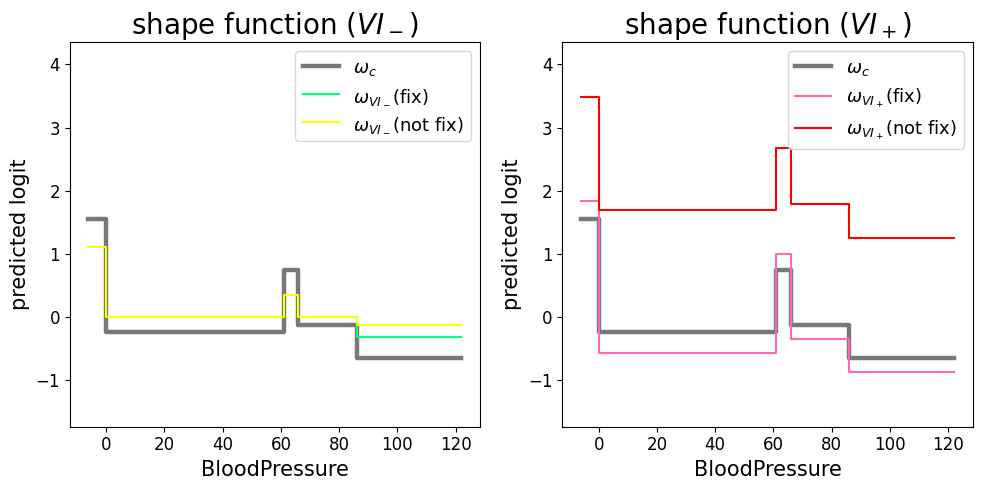

(CVXPY) Jan 20 07:07:25 AM: Your problem has 36 variables, 35 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:25 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:25 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:25 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:25 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:25 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:25 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:25 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:25 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:25 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:25 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:25 AM: Finished problem compilation (took 5.099

SkinThickness
----------------------variable importance Minus----------------------
                                     CVXPY                                     
                                     v1.6.7                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 73, constraints m: 145


(CVXPY) Jan 20 07:07:26 AM: Finished problem compilation (took 4.631e-02 seconds).
(CVXPY) Jan 20 07:07:26 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:26 AM: Problem status: optimal
(CVXPY) Jan 20 07:07:26 AM: Optimal value: 2.462e-01
(CVXPY) Jan 20 07:07:26 AM: Compilation took 4.631e-02 seconds
(CVXPY) Jan 20 07:07:26 AM: Solver (including time spent in interface) took 5.093e-03 seconds
(CVXPY) Jan 20 07:07:26 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:26 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:26 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:26 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:26 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:26 AM: Compiling problem (target s

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 34
	  l: linear vars: 3
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:26 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:26 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:26 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:26 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:26 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:26 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:26 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:26 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:26 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:26 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:26 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:26 AM: Finished problem compilation (took 4.610e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 34
	  l: linear vars: 3
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize:

(CVXPY) Jan 20 07:07:26 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:26 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:26 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:26 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:26 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:26 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:26 AM: Finished problem compilation (took 1.946e-02 seconds).
(CVXPY) Jan 20 07:07:26 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:26 AM: Problem status: optimal
(CVXPY) Jan 20 07:07:26 AM: Optimal value: 6.776e-01
(CVXPY) Jan 20 07:07:26 AM: Compilation took 1.946e-02 seconds
(CVXPY) Jan 20 07:07:26 AM: Solver (including time spent in interface) took 6.416e-03 seconds
(CVXPY) Jan 20 07:07:26 AM: Your problem has 36 variables, 3 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:26 AM: It is compliant with the following grammars: DCP, 

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 41
cones: 	  l: linear vars: 3
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1301, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
--------

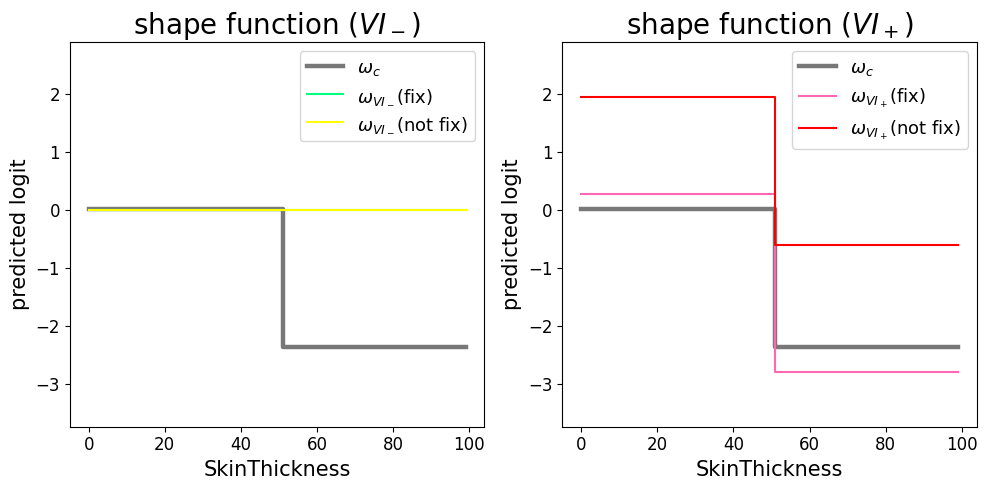

(CVXPY) Jan 20 07:07:27 AM: Your problem has 36 variables, 33 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:27 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:27 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:27 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:27 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:27 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:27 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:27 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:27 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:27 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:27 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:27 AM: Finished problem compilation (took 4.590

Insulin
----------------------variable importance Minus----------------------
                                     CVXPY                                     
                                     v1.6.7                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 73, constraints m: 143
cones:

(CVXPY) Jan 20 07:07:27 AM: Finished problem compilation (took 4.604e-02 seconds).
(CVXPY) Jan 20 07:07:27 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:27 AM: Problem status: optimal
(CVXPY) Jan 20 07:07:27 AM: Optimal value: 2.449e-01
(CVXPY) Jan 20 07:07:27 AM: Compilation took 4.604e-02 seconds
(CVXPY) Jan 20 07:07:27 AM: Solver (including time spent in interface) took 5.732e-03 seconds
(CVXPY) Jan 20 07:07:27 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:27 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:27 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:27 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:27 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:27 AM: Compiling problem (target s

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 32
	  l: linear vars: 5
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:27 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:27 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:27 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:27 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:27 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:27 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:27 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:27 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:27 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:27 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:27 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:27 AM: Finished problem compilation (took 4.671e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 32
	  l: linear vars: 5
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize:

(CVXPY) Jan 20 07:07:27 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:27 AM: Finished problem compilation (took 4.725e-02 seconds).
(CVXPY) Jan 20 07:07:27 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:27 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:27 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:27 AM: Compilation took 4.725e-02 seconds
(CVXPY) Jan 20 07:07:27 AM: Solver (including time spent in interface) took 7.272e-03 seconds
(CVXPY) Jan 20 07:07:27 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:27 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:27 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:27 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:27 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 32
	  l: linear vars: 5
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:28 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:28 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:28 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:28 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:28 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:28 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:28 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:28 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:28 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:28 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:28 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:28 AM: Finished problem compilation (took 5.533e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 32
	  l: linear vars: 5
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize:

(CVXPY) Jan 20 07:07:28 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:28 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:28 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:28 AM: Finished problem compilation (took 3.412e-01 seconds).
(CVXPY) Jan 20 07:07:28 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:28 AM: Problem status: optimal
(CVXPY) Jan 20 07:07:28 AM: Optimal value: 4.271e-01
(CVXPY) Jan 20 07:07:28 AM: Compilation took 3.412e-01 seconds
(CVXPY) Jan 20 07:07:28 AM: Solver (including time spent in interface) took 7.293e-03 seconds
(CVXPY) Jan 20 07:07:28 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:28 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:28 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:28 AM: CVXPY will first compile your problem; then, it will invoke a numeric

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 32
	  l: linear vars: 5
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:28 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:28 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:28 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:28 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:28 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:28 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:28 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:28 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:28 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:28 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:28 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:28 AM: Finished problem compilation (took 5.367e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 32
	  l: linear vars: 5
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize:

(CVXPY) Jan 20 07:07:28 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:28 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:28 AM: Finished problem compilation (took 4.810e-02 seconds).
(CVXPY) Jan 20 07:07:28 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:28 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:28 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:28 AM: Compilation took 4.810e-02 seconds
(CVXPY) Jan 20 07:07:28 AM: Solver (including time spent in interface) took 7.115e-03 seconds
(CVXPY) Jan 20 07:07:28 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:29 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:29 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:29 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:29 AM: Your

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 32
	  l: linear vars: 5
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:29 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:29 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:29 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:29 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:29 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:29 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:29 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:29 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:29 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:29 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:29 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:29 AM: Finished problem compilation (took 2.180e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 43
cones: 	  l: linear vars: 5
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_loo

(CVXPY) Jan 20 07:07:29 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:29 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:29 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:29 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:29 AM: Finished problem compilation (took 2.461e-02 seconds).
(CVXPY) Jan 20 07:07:29 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:29 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:29 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:29 AM: Compilation took 2.461e-02 seconds
(CVXPY) Jan 20 07:07:29 AM: Solver (including time spent in interface) took 1.743e-02 seconds
(CVXPY) Jan 20 07:07:29 AM: Your problem has 36 variables, 5 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:29 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:29 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:29 AM: CVXPY will first

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 43
cones: 	  l: linear vars: 5
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1303, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
--------

/usr/local/lib/python3.12/dist-packages/cvxpy/problems/problem.py:1510: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
(CVXPY) Jan 20 07:07:31 AM: Problem status: infeasible_inaccurate
(CVXPY) Jan 20 07:07:31 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:31 AM: Compilation took 2.312e-02 seconds
(CVXPY) Jan 20 07:07:31 AM: Solver (including time spent in interface) took 2.167e+00 seconds
(CVXPY) Jan 20 07:07:31 AM: Your problem has 36 variables, 5 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:31 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:31 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:31 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:31 AM: Your problem is compiled with the C

190500| 5.04e+09  4.46e+09  3.46e+16  1.73e+16  1.75e+00  2.05e+00 
190750| 5.04e+09  4.46e+09  3.46e+16  1.73e+16  1.75e+00  2.05e+00 
191000| 5.04e+09  4.46e+09  3.46e+16  1.73e+16  1.75e+00  2.06e+00 
191250| 5.05e+09  4.47e+09  3.46e+16  1.73e+16  1.75e+00  2.06e+00 
191500| 5.05e+09  4.47e+09  3.46e+16  1.73e+16  1.75e+00  2.06e+00 
191750| 5.05e+09  4.47e+09  3.46e+16  1.73e+16  1.75e+00  2.06e+00 
192000| 5.06e+09  4.48e+09  3.46e+16  1.73e+16  1.75e+00  2.07e+00 
192250| 5.06e+09  4.48e+09  3.46e+16  1.73e+16  1.75e+00  2.07e+00 
192500| 1.10e+00  8.88e-01  1.31e+02  6.55e+01  1.75e+00  2.07e+00 
192750| 5.07e+09  4.49e+09  3.46e+16  1.73e+16  1.75e+00  2.07e+00 
193000| 5.07e+09  4.49e+09  3.46e+16  1.73e+16  1.75e+00  2.08e+00 
193250| 5.08e+09  4.49e+09  3.46e+16  1.73e+16  1.75e+00  2.08e+00 
193500| 5.08e+09  4.49e+09  3.45e+16  1.73e+16  1.75e+00  2.08e+00 
193750| 5.08e+09  4.50e+09  3.45e+16  1.73e+16  1.75e+00  2.08e+00 
194000| 5.09e+09  4.50e+09  3.45e+16  1.73e+16  

(CVXPY) Jan 20 07:07:31 AM: Problem status: optimal
(CVXPY) Jan 20 07:07:31 AM: Optimal value: 1.931e+00
(CVXPY) Jan 20 07:07:31 AM: Compilation took 2.783e-02 seconds
(CVXPY) Jan 20 07:07:31 AM: Solver (including time spent in interface) took 1.579e-02 seconds
(CVXPY) Jan 20 07:07:31 AM: Your problem has 36 variables, 5 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:31 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:31 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:31 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:31 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:31 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:31 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:31 A

                                     CVXPY                                     
                                     v1.6.7                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 43
cones: 	  l: linear vars: 5
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, 

(CVXPY) Jan 20 07:07:32 AM: Problem status: optimal
(CVXPY) Jan 20 07:07:32 AM: Optimal value: 1.962e+00
(CVXPY) Jan 20 07:07:32 AM: Compilation took 2.139e-02 seconds
(CVXPY) Jan 20 07:07:32 AM: Solver (including time spent in interface) took 1.494e-02 seconds
(CVXPY) Jan 20 07:07:32 AM: Your problem has 36 variables, 5 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:32 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:32 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:32 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:32 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:32 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:32 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:32 A

   825| 7.58e-05  4.15e-06  1.14e-05 -1.96e+00  1.00e-01  1.30e-02 
------------------------------------------------------------------
status:  solved
timings: total: 1.30e-02s = setup: 8.88e-04s + solve: 1.21e-02s
	 lin-sys: 9.94e-03s, cones: 3.12e-04s, accel: 2.73e-04s
------------------------------------------------------------------
objective = -1.961972
------------------------------------------------------------------
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
                                     CVXPY                                     
                                     v1.6.7                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
------------

(CVXPY) Jan 20 07:07:32 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:32 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:32 AM: Compilation took 2.914e-02 seconds
(CVXPY) Jan 20 07:07:32 AM: Solver (including time spent in interface) took 5.090e-01 seconds
(CVXPY) Jan 20 07:07:32 AM: Your problem has 36 variables, 5 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:32 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:32 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:32 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:32 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:32 AM: Compiling problem (target solver=SCS).


 25750| 2.25e+10  1.99e+10  2.43e+16  1.22e+16  1.00e-01  3.38e-01 
 26000| 2.27e+10  2.01e+10  2.43e+16  1.22e+16  1.00e-01  3.41e-01 
 26250| 2.29e+10  2.03e+10  2.43e+16  1.22e+16  1.00e-01  3.44e-01 
 26500| 2.31e+10  2.05e+10  2.43e+16  1.22e+16  1.00e-01  3.46e-01 
 26750| 2.33e+10  2.06e+10  2.43e+16  1.22e+16  1.00e-01  3.49e-01 
 27000| 2.34e+10  2.07e+10  2.43e+16  1.22e+16  1.00e-01  3.51e-01 
 27250| 2.35e+10  2.08e+10  2.43e+16  1.22e+16  1.00e-01  3.54e-01 
 27500| 2.88e+14  1.56e+12  2.44e+16  1.22e+16  1.00e-01  3.57e-01 
 27750| 2.41e+10  2.14e+10  2.43e+16  1.22e+16  1.00e-01  3.59e-01 
 28000| 2.43e+10  2.15e+10  2.43e+16  1.22e+16  1.00e-01  3.62e-01 
 28250| 2.46e+10  2.17e+10  2.43e+16  1.22e+16  1.00e-01  3.64e-01 
 28500| 2.48e+10  2.19e+10  2.43e+16  1.22e+16  1.00e-01  3.67e-01 
 28750| 2.51e+10  2.22e+10  2.43e+16  1.22e+16  1.00e-01  3.70e-01 
 29000| 2.52e+10  2.23e+10  2.43e+16  1.21e+16  1.00e-01  3.72e-01 
 29250| 2.56e+10  2.26e+10  2.43e+16  1.21e+16  

(CVXPY) Jan 20 07:07:32 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:32 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:32 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:32 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:32 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:32 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:32 AM: Finished problem compilation (took 2.875e-02 seconds).
(CVXPY) Jan 20 07:07:32 AM: Invoking solver SCS  to obtain a solution.


-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 43
cones: 	  l: linear vars: 5
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1303, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
--------

(CVXPY) Jan 20 07:07:33 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:33 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:33 AM: Compilation took 2.875e-02 seconds
(CVXPY) Jan 20 07:07:33 AM: Solver (including time spent in interface) took 9.135e-01 seconds
(CVXPY) Jan 20 07:07:33 AM: Your problem has 36 variables, 5 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:33 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:33 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:33 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:33 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:33 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:33 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:33 AM:

 69500| 2.86e+10  2.53e+10  2.86e+16  1.43e+16  1.00e-01  8.20e-01 
 69750| 2.89e+10  2.56e+10  2.86e+16  1.43e+16  1.00e-01  8.23e-01 
 70000| 2.94e+10  2.61e+10  2.86e+16  1.43e+16  1.00e-01  8.26e-01 
 70250| 2.97e+10  2.63e+10  2.86e+16  1.43e+16  1.00e-01  8.28e-01 
 70500| 3.05e+10  2.70e+10  2.86e+16  1.43e+16  1.00e-01  8.31e-01 
 70750| 3.09e+10  2.73e+10  2.86e+16  1.43e+16  1.00e-01  8.34e-01 
 71000| 3.14e+10  2.78e+10  2.86e+16  1.43e+16  1.00e-01  8.36e-01 
 71250| 3.19e+10  2.82e+10  2.86e+16  1.43e+16  1.00e-01  8.39e-01 
 71500| 3.08e+11  3.08e+10  2.87e+16  1.44e+16  1.00e-01  8.41e-01 
 71750| 3.32e+10  2.94e+10  2.86e+16  1.43e+16  1.00e-01  8.44e-01 
 72000| 3.36e+10  2.98e+10  2.86e+16  1.43e+16  1.00e-01  8.46e-01 
 72250| 3.44e+10  3.05e+10  2.86e+16  1.43e+16  1.00e-01  8.49e-01 
 72500| 3.51e+10  3.10e+10  2.86e+16  1.43e+16  1.00e-01  8.52e-01 
 72750| 3.60e+10  3.18e+10  2.86e+16  1.43e+16  1.00e-01  8.54e-01 
 73000| 3.71e+10  3.29e+10  2.86e+16  1.43e+16  

(CVXPY) Jan 20 07:07:33 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:33 AM: Finished problem compilation (took 2.264e-02 seconds).
(CVXPY) Jan 20 07:07:33 AM: Invoking solver SCS  to obtain a solution.


-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 43
cones: 	  l: linear vars: 5
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1303, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
--------

(CVXPY) Jan 20 07:07:34 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:34 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:34 AM: Compilation took 2.264e-02 seconds
(CVXPY) Jan 20 07:07:34 AM: Solver (including time spent in interface) took 3.174e-01 seconds


 18000| 2.83e+10  2.50e+10  1.29e+16  6.46e+15  1.00e-01  2.04e-01 
 18250| 2.88e+10  2.55e+10  1.29e+16  6.46e+15  1.00e-01  2.07e-01 
 18500| 2.91e+10  2.58e+10  1.29e+16  6.45e+15  1.00e-01  2.12e-01 
 18750| 2.99e+10  2.65e+10  1.29e+16  6.45e+15  1.00e-01  2.15e-01 
 19000| 3.02e+10  2.67e+10  1.29e+16  6.45e+15  1.00e-01  2.19e-01 
 19250| 3.06e+10  2.70e+10  1.29e+16  6.45e+15  1.00e-01  2.22e-01 
 19500| 3.12e+10  2.76e+10  1.29e+16  6.45e+15  1.00e-01  2.26e-01 
 19750| 3.17e+10  2.80e+10  1.29e+16  6.45e+15  1.00e-01  2.29e-01 
 20000| 3.23e+10  2.86e+10  1.29e+16  6.45e+15  1.00e-01  2.34e-01 
 20250| 3.40e+11  3.42e+10  1.30e+16  6.49e+15  1.00e-01  2.36e-01 
 20500| 3.36e+10  2.98e+10  1.29e+16  6.45e+15  1.00e-01  2.39e-01 
 20750| 3.41e+10  3.02e+10  1.29e+16  6.44e+15  1.00e-01  2.43e-01 
 21000| 3.49e+10  3.09e+10  1.29e+16  6.44e+15  1.00e-01  2.45e-01 
 21250| 3.58e+10  3.17e+10  1.29e+16  6.44e+15  1.00e-01  2.48e-01 
 21500| 3.65e+10  3.23e+10  1.29e+16  6.44e+15  

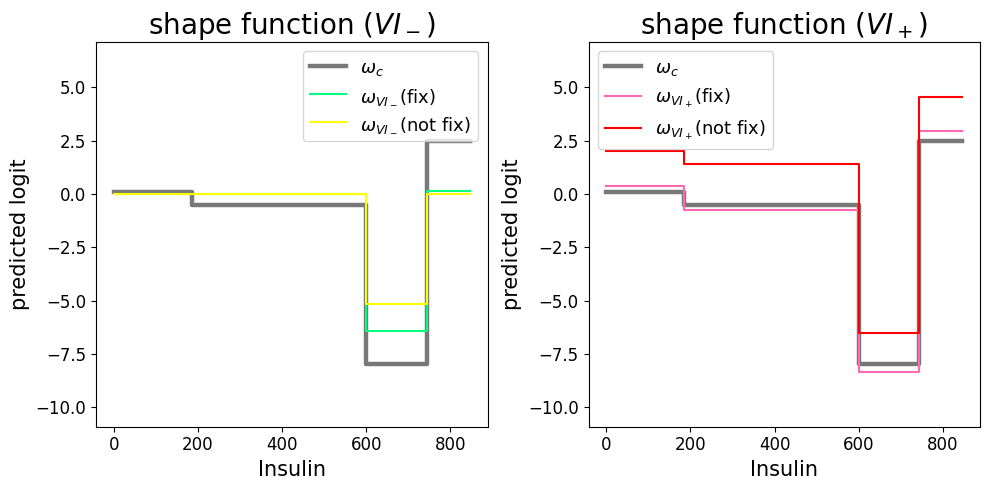

(CVXPY) Jan 20 07:07:34 AM: Your problem has 36 variables, 30 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:34 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:34 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:34 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:34 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:34 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:34 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:34 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:34 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:34 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:34 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:34 AM: Finished problem compilation (took 4.488

BMI
----------------------variable importance Minus----------------------
                                     CVXPY                                     
                                     v1.6.7                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 73, constraints m: 140
cones: 	  

(CVXPY) Jan 20 07:07:34 AM: Finished problem compilation (took 5.136e-02 seconds).
(CVXPY) Jan 20 07:07:34 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:34 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:34 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:34 AM: Compilation took 5.136e-02 seconds
(CVXPY) Jan 20 07:07:34 AM: Solver (including time spent in interface) took 5.779e-03 seconds
(CVXPY) Jan 20 07:07:34 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:34 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:34 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:34 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:34 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:34 AM: Compiling problem (target sol

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:35 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:35 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:35 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:35 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:35 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:35 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:35 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:35 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:35 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:35 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:35 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:35 AM: Applying redu

                                     CVXPY                                     
                                     v1.6.7                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38

(CVXPY) Jan 20 07:07:35 AM: Finished problem compilation (took 6.800e-02 seconds).
(CVXPY) Jan 20 07:07:35 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:35 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:35 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:35 AM: Compilation took 6.800e-02 seconds
(CVXPY) Jan 20 07:07:35 AM: Solver (including time spent in interface) took 9.061e-03 seconds
(CVXPY) Jan 20 07:07:35 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:35 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:35 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:35 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:35 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:35 AM: Compiling problem (target sol

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:35 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:35 AM: Finished problem compilation (took 6.407e-02 seconds).
(CVXPY) Jan 20 07:07:35 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:35 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:35 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:35 AM: Compilation took 6.407e-02 seconds
(CVXPY) Jan 20 07:07:35 AM: Solver (including time spent in interface) took 6.321e-03 seconds
(CVXPY) Jan 20 07:07:35 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:35 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:35 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:35 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:35 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:35 AM: Finished problem compilation (took 5.784e-02 seconds).
(CVXPY) Jan 20 07:07:35 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:35 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:35 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:35 AM: Compilation took 5.784e-02 seconds
(CVXPY) Jan 20 07:07:35 AM: Solver (including time spent in interface) took 8.604e-03 seconds
(CVXPY) Jan 20 07:07:35 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:35 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:35 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:35 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:35 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:35 AM: Compiling problem (target sol

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:35 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:35 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:35 AM: Compilation took 4.423e-02 seconds
(CVXPY) Jan 20 07:07:35 AM: Solver (including time spent in interface) took 6.679e-03 seconds
(CVXPY) Jan 20 07:07:35 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:35 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:35 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:35 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:35 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:35 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:35 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:35 AM

   250| 4.13e-01  5.86e-03  5.67e+00  2.19e+00  3.37e-01  4.67e-03 
   350| 8.08e+09  3.35e+07  1.30e+19  6.50e+18  3.37e-01  5.98e-03 
------------------------------------------------------------------
status:  infeasible
timings: total: 5.99e-03s = setup: 7.39e-04s + solve: 5.25e-03s
	 lin-sys: 4.03e-03s, cones: 1.64e-04s, accel: 1.01e-04s
------------------------------------------------------------------
objective = inf
------------------------------------------------------------------
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
                                     CVXPY                                     
                                     v1.6.7                                    
-------------------------------------------------------------------------------
                          

(CVXPY) Jan 20 07:07:36 AM: Finished problem compilation (took 6.116e-02 seconds).
(CVXPY) Jan 20 07:07:36 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:36 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:36 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:36 AM: Compilation took 6.116e-02 seconds
(CVXPY) Jan 20 07:07:36 AM: Solver (including time spent in interface) took 7.459e-03 seconds
(CVXPY) Jan 20 07:07:36 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:36 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:36 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:36 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:36 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:36 AM: Compiling problem (target sol

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:36 AM: Finished problem compilation (took 4.869e-02 seconds).
(CVXPY) Jan 20 07:07:36 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:36 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:36 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:36 AM: Compilation took 4.869e-02 seconds
(CVXPY) Jan 20 07:07:36 AM: Solver (including time spent in interface) took 8.718e-03 seconds
(CVXPY) Jan 20 07:07:36 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:36 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:36 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:36 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:36 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:36 AM: Compiling problem (target sol

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:36 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:36 AM: Finished problem compilation (took 6.721e-02 seconds).
(CVXPY) Jan 20 07:07:36 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:36 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:36 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:36 AM: Compilation took 6.721e-02 seconds
(CVXPY) Jan 20 07:07:36 AM: Solver (including time spent in interface) took 6.256e-03 seconds
(CVXPY) Jan 20 07:07:36 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:36 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:36 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:36 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:36 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:36 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:36 AM: Finished problem compilation (took 7.020e-02 seconds).
(CVXPY) Jan 20 07:07:36 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:36 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:36 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:36 AM: Compilation took 7.020e-02 seconds
(CVXPY) Jan 20 07:07:36 AM: Solver (including time spent in interface) took 8.411e-03 seconds
(CVXPY) Jan 20 07:07:36 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:36 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:36 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:36 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:36 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:37 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:37 AM: Finished problem compilation (took 6.121e-02 seconds).
(CVXPY) Jan 20 07:07:37 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:37 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:37 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:37 AM: Compilation took 6.121e-02 seconds
(CVXPY) Jan 20 07:07:37 AM: Solver (including time spent in interface) took 6.994e-03 seconds
(CVXPY) Jan 20 07:07:37 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:37 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:37 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:37 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:37 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:37 AM: Finished problem compilation (took 5.643e-02 seconds).
(CVXPY) Jan 20 07:07:37 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:37 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:37 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:37 AM: Compilation took 5.643e-02 seconds
(CVXPY) Jan 20 07:07:37 AM: Solver (including time spent in interface) took 7.110e-03 seconds
(CVXPY) Jan 20 07:07:37 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:37 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:37 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:37 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:37 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:37 AM: Compiling problem (target sol

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:37 AM: Compilation took 5.233e-02 seconds
(CVXPY) Jan 20 07:07:37 AM: Solver (including time spent in interface) took 6.433e-03 seconds
(CVXPY) Jan 20 07:07:37 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:37 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:37 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:37 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:37 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:37 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:37 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:37 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:37 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 

                                     CVXPY                                     
                                     v1.6.7                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38

(CVXPY) Jan 20 07:07:37 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:37 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:37 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:37 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:37 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:37 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:37 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:37 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:37 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:37 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:37 AM: Finished problem compilation (took 5.033e-02 seconds).
(CVXPY) Jan 20 07:07:37 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 

-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize:

(CVXPY) Jan 20 07:07:37 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:37 AM: Finished problem compilation (took 6.417e-02 seconds).
(CVXPY) Jan 20 07:07:37 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:37 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:37 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:37 AM: Compilation took 6.417e-02 seconds
(CVXPY) Jan 20 07:07:37 AM: Solver (including time spent in interface) took 6.791e-03 seconds
(CVXPY) Jan 20 07:07:37 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:38 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:38 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:38 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:38 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:38 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:38 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:38 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:38 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:38 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:38 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:38 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:38 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:38 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:38 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:38 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:38 AM: Finished problem compilation (took 4.760e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize:

(CVXPY) Jan 20 07:07:38 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:38 AM: Finished problem compilation (took 4.974e-02 seconds).
(CVXPY) Jan 20 07:07:38 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:38 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:38 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:38 AM: Compilation took 4.974e-02 seconds
(CVXPY) Jan 20 07:07:38 AM: Solver (including time spent in interface) took 6.183e-03 seconds
(CVXPY) Jan 20 07:07:38 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:38 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:38 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:38 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:38 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:38 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:38 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:38 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:38 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:38 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:38 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:38 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:38 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:38 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:38 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:38 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:38 AM: Applying redu

-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize:

(CVXPY) Jan 20 07:07:38 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:38 AM: Finished problem compilation (took 5.060e-02 seconds).
(CVXPY) Jan 20 07:07:38 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:38 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:38 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:38 AM: Compilation took 5.060e-02 seconds
(CVXPY) Jan 20 07:07:38 AM: Solver (including time spent in interface) took 5.636e-03 seconds
(CVXPY) Jan 20 07:07:38 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:38 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:38 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:38 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:38 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:39 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:39 AM: Finished problem compilation (took 6.117e-02 seconds).
(CVXPY) Jan 20 07:07:39 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:39 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:39 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:39 AM: Compilation took 6.117e-02 seconds
(CVXPY) Jan 20 07:07:39 AM: Solver (including time spent in interface) took 6.641e-03 seconds
(CVXPY) Jan 20 07:07:39 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:39 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:39 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:39 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:39 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:39 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:39 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:39 AM: Compilation took 5.358e-02 seconds
(CVXPY) Jan 20 07:07:39 AM: Solver (including time spent in interface) took 6.586e-03 seconds
(CVXPY) Jan 20 07:07:39 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:39 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:39 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:39 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:39 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:39 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:39 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:39 AM

------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
------------------------------------------------------------------
     0| 7.99e+00  3.97e-01  2.43e+00 -1.33e+00  1.00e-01  2.53e-03 
   250| 1.21e+13  1.30e+11  1.91e+19  9.55e+18  4.26e-01  5.50e-03 
------

(CVXPY) Jan 20 07:07:39 AM: Finished problem compilation (took 5.780e-02 seconds).
(CVXPY) Jan 20 07:07:39 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:39 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:39 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:39 AM: Compilation took 5.780e-02 seconds
(CVXPY) Jan 20 07:07:39 AM: Solver (including time spent in interface) took 6.207e-03 seconds
(CVXPY) Jan 20 07:07:39 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:39 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:39 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:39 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:39 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:39 AM: Compiling problem (target sol

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:39 AM: Finished problem compilation (took 5.582e-02 seconds).
(CVXPY) Jan 20 07:07:39 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:39 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:39 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:39 AM: Compilation took 5.582e-02 seconds
(CVXPY) Jan 20 07:07:39 AM: Solver (including time spent in interface) took 5.399e-03 seconds
(CVXPY) Jan 20 07:07:39 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:39 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:39 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:39 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:39 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:39 AM: Compiling problem (target sol

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:39 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:39 AM: Finished problem compilation (took 5.104e-02 seconds).
(CVXPY) Jan 20 07:07:39 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:39 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:39 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:39 AM: Compilation took 5.104e-02 seconds
(CVXPY) Jan 20 07:07:39 AM: Solver (including time spent in interface) took 4.699e-03 seconds
(CVXPY) Jan 20 07:07:40 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:40 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:40 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:40 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:40 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:40 AM: Finished problem compilation (took 7.058e-02 seconds).
(CVXPY) Jan 20 07:07:40 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:40 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:40 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:40 AM: Compilation took 7.058e-02 seconds
(CVXPY) Jan 20 07:07:40 AM: Solver (including time spent in interface) took 4.935e-03 seconds
(CVXPY) Jan 20 07:07:40 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:40 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:40 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:40 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:40 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:40 AM: Compiling problem (target sol

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:40 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:40 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:40 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:40 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:40 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:40 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:40 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:40 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:40 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:40 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:40 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:40 AM: Finished problem compilation (took 4.850e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize:

(CVXPY) Jan 20 07:07:40 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:40 AM: Finished problem compilation (took 4.871e-02 seconds).
(CVXPY) Jan 20 07:07:40 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:40 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:40 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:40 AM: Compilation took 4.871e-02 seconds
(CVXPY) Jan 20 07:07:40 AM: Solver (including time spent in interface) took 8.708e-03 seconds
(CVXPY) Jan 20 07:07:40 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:40 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:40 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:40 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:40 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:40 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:40 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:40 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:40 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:40 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:40 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:40 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:40 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:40 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:40 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:40 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:40 AM: Applying redu

                                     CVXPY                                     
                                     v1.6.7                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38

(CVXPY) Jan 20 07:07:41 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:41 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:41 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:41 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:41 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:41 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:41 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:41 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:41 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:41 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:41 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:41 AM: Finished problem compilation (took 4.849e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize:

(CVXPY) Jan 20 07:07:41 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:41 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:41 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:41 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:41 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:41 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:41 AM: Finished problem compilation (took 4.639e-02 seconds).
(CVXPY) Jan 20 07:07:41 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:41 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:41 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:41 AM: Compilation took 4.639e-02 seconds
(CVXPY) Jan 20 07:07:41 AM: Solver (including time spent in interface) took 4.688e-03 seconds
(CVXPY) Jan 20 07:07:41 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:41 AM: It is compliant with the following grammars: DCP, D

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:41 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:41 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:41 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:41 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:41 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:41 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:41 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:41 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:41 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:41 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:41 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:41 AM: Finished problem compilation (took 4.687e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize:

(CVXPY) Jan 20 07:07:41 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:41 AM: Finished problem compilation (took 5.043e-02 seconds).
(CVXPY) Jan 20 07:07:41 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:41 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:41 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:41 AM: Compilation took 5.043e-02 seconds
(CVXPY) Jan 20 07:07:41 AM: Solver (including time spent in interface) took 8.339e-03 seconds
(CVXPY) Jan 20 07:07:41 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:41 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:41 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:41 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:41 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:42 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:42 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:42 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:42 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:42 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:42 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:42 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:42 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:42 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:42 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:42 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:42 AM: Applying redu

                                     CVXPY                                     
                                     v1.6.7                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38

(CVXPY) Jan 20 07:07:42 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:42 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:42 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:42 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:42 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:42 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:42 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:42 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:42 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:42 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:42 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:42 AM: Finished problem compilation (took 4.670e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize:

(CVXPY) Jan 20 07:07:42 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:42 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:42 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:42 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:42 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:42 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:42 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:42 AM: Finished problem compilation (took 5.117e-02 seconds).
(CVXPY) Jan 20 07:07:42 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:42 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:42 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:42 AM: Compilation took 5.117e-02 seconds
(CVXPY) Jan 20 07:07:42 AM: Solver (including time spent in interface) took 6.514e-03 seconds
(CVXPY) Jan 20 07:07:42 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:42 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:42 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:42 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:42 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:42 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:42 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:42 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:42 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:42 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:42 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:42 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:42 AM: Applying redu

                                     CVXPY                                     
                                     v1.6.7                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38

(CVXPY) Jan 20 07:07:42 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:42 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:42 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:42 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:42 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:42 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:42 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:42 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:42 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:42 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:42 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:42 AM: Finished problem compilation (took 4.829e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize:

(CVXPY) Jan 20 07:07:43 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:43 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:43 AM: Finished problem compilation (took 4.799e-02 seconds).
(CVXPY) Jan 20 07:07:43 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:43 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:43 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:43 AM: Compilation took 4.799e-02 seconds
(CVXPY) Jan 20 07:07:43 AM: Solver (including time spent in interface) took 7.408e-03 seconds
(CVXPY) Jan 20 07:07:43 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:43 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:43 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:43 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:43 AM: Your

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:43 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:43 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:43 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:43 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:43 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:43 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:43 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:43 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:43 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:43 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:43 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:43 AM: Applying redu

-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize:

(CVXPY) Jan 20 07:07:43 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:43 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:43 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:43 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:43 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:43 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:43 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:43 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:43 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:43 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:43 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:43 AM: Finished problem compilation (took 4.561e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize:

(CVXPY) Jan 20 07:07:43 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:43 AM: Finished problem compilation (took 4.985e-02 seconds).
(CVXPY) Jan 20 07:07:43 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:43 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:43 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:43 AM: Compilation took 4.985e-02 seconds
(CVXPY) Jan 20 07:07:43 AM: Solver (including time spent in interface) took 5.543e-03 seconds
(CVXPY) Jan 20 07:07:43 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:43 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:43 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:43 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:43 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:44 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:44 AM: Finished problem compilation (took 3.157e-01 seconds).
(CVXPY) Jan 20 07:07:44 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:44 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:44 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:44 AM: Compilation took 3.157e-01 seconds
(CVXPY) Jan 20 07:07:44 AM: Solver (including time spent in interface) took 1.500e-02 seconds
(CVXPY) Jan 20 07:07:44 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:44 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:44 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:44 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:44 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:44 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:44 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:44 AM: Compilation took 4.719e-02 seconds
(CVXPY) Jan 20 07:07:44 AM: Solver (including time spent in interface) took 1.526e-02 seconds
(CVXPY) Jan 20 07:07:44 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:44 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:44 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:44 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:44 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:44 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:44 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:44 AM

-------------------------------------------
status:  infeasible
timings: total: 1.36e-02s = setup: 7.25e-04s + solve: 1.29e-02s
	 lin-sys: 1.02e-02s, cones: 5.48e-04s, accel: 3.02e-04s
------------------------------------------------------------------
objective = inf
------------------------------------------------------------------
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
                                     CVXPY                                     
                                     v1.6.7                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------

(CVXPY) Jan 20 07:07:44 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:44 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:44 AM: Compilation took 6.391e-02 seconds
(CVXPY) Jan 20 07:07:44 AM: Solver (including time spent in interface) took 1.438e-02 seconds
(CVXPY) Jan 20 07:07:44 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:44 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:44 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:44 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:44 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:44 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:44 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:44 AM

----------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
------------------------------------------------------------------
     0| 7.99e+00  3.41e-01  2.60e+00 -1.51e+00  1.00e-01  2.49e-03 
   250| 1.47e-01  1.30e-03  4.22e-01 -6.21e-01  3.37e-01  5.26e-03 
   500| 1.30e-01  2.37e-03  9.31e-01 -2.96e-01  3.37e-01  8.10e-03 
   750| 1.27e-01  6.88e-03  2.79e+00  6.70e-01  3.37e-01  1.17e-02 
   925| 1.79e+11  9.03e+08  3.96e+18  1.98e+18  3.37e-01  1.36e-02 
---------------------

(CVXPY) Jan 20 07:07:44 AM: Finished problem compilation (took 5.366e-02 seconds).
(CVXPY) Jan 20 07:07:44 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:44 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:44 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:44 AM: Compilation took 5.366e-02 seconds
(CVXPY) Jan 20 07:07:44 AM: Solver (including time spent in interface) took 1.288e-02 seconds
(CVXPY) Jan 20 07:07:44 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:44 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:44 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:44 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:44 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:44 AM: Compiling problem (target sol

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:44 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:44 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:44 AM: Compilation took 5.203e-02 seconds
(CVXPY) Jan 20 07:07:44 AM: Solver (including time spent in interface) took 1.173e-02 seconds
(CVXPY) Jan 20 07:07:45 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:45 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:45 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:45 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:45 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:45 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:45 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:45 AM

   500| 1.78e-01  5.69e-03  2.31e+00  5.59e-01  3.33e-01  8.17e-03 
   725| 1.85e+07  3.00e+05  5.13e+18  2.57e+18  3.33e-01  1.09e-02 
------------------------------------------------------------------
status:  infeasible
timings: total: 1.10e-02s = setup: 7.63e-04s + solve: 1.02e-02s
	 lin-sys: 8.05e-03s, cones: 3.68e-04s, accel: 2.14e-04s
------------------------------------------------------------------
objective = inf
------------------------------------------------------------------
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
                                     CVXPY                                     
                                     v1.6.7                                    
-------------------------------------------------------------------------------
                          

(CVXPY) Jan 20 07:07:45 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:45 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:45 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:45 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:45 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:45 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:45 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:45 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:45 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:45 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:45 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:45 AM: Applying redu

-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize:

(CVXPY) Jan 20 07:07:45 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:45 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:45 AM: Finished problem compilation (took 4.843e-02 seconds).
(CVXPY) Jan 20 07:07:45 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:45 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:45 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:45 AM: Compilation took 4.843e-02 seconds
(CVXPY) Jan 20 07:07:45 AM: Solver (including time spent in interface) took 6.560e-03 seconds
(CVXPY) Jan 20 07:07:45 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:45 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:45 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:45 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:45 AM: Your

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:45 AM: Finished problem compilation (took 6.057e-02 seconds).
(CVXPY) Jan 20 07:07:45 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:45 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:45 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:45 AM: Compilation took 6.057e-02 seconds
(CVXPY) Jan 20 07:07:45 AM: Solver (including time spent in interface) took 7.551e-03 seconds
(CVXPY) Jan 20 07:07:45 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:45 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:45 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:45 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:45 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:45 AM: Compiling problem (target sol

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:45 AM: Solver (including time spent in interface) took 7.164e-03 seconds
(CVXPY) Jan 20 07:07:45 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:45 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:45 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:45 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:45 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:45 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:45 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:45 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:45 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:45 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 2

                                     CVXPY                                     
                                     v1.6.7                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38

(CVXPY) Jan 20 07:07:46 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:46 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:46 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:46 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:46 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:46 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:46 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:46 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:46 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:46 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:46 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:46 AM: Finished problem compilation (took 4.940e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize:

(CVXPY) Jan 20 07:07:46 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:46 AM: Finished problem compilation (took 4.931e-02 seconds).
(CVXPY) Jan 20 07:07:46 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:46 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:46 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:46 AM: Compilation took 4.931e-02 seconds
(CVXPY) Jan 20 07:07:46 AM: Solver (including time spent in interface) took 1.096e-02 seconds
(CVXPY) Jan 20 07:07:46 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:46 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:46 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:46 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:46 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:46 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:46 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:46 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:46 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:46 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:46 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:46 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:46 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:46 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:46 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:46 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:46 AM: Applying redu

                                     CVXPY                                     
                                     v1.6.7                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38

(CVXPY) Jan 20 07:07:46 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:46 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:46 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:46 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:46 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:46 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:46 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:46 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:46 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:46 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:46 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:46 AM: Finished problem compilation (took 4.899e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize:

(CVXPY) Jan 20 07:07:46 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:46 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:47 AM: Finished problem compilation (took 4.803e-02 seconds).
(CVXPY) Jan 20 07:07:47 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:47 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:47 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:47 AM: Compilation took 4.803e-02 seconds
(CVXPY) Jan 20 07:07:47 AM: Solver (including time spent in interface) took 6.285e-03 seconds
(CVXPY) Jan 20 07:07:47 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:47 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:47 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:47 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:47 AM: Your

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:47 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:47 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:47 AM: Compilation took 4.781e-02 seconds
(CVXPY) Jan 20 07:07:47 AM: Solver (including time spent in interface) took 1.048e-02 seconds
(CVXPY) Jan 20 07:07:47 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:47 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:47 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:47 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:47 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:47 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:47 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:47 AM

   475| 2.20e+08  9.62e+06  9.57e+18  4.79e+18  3.19e-01  9.69e-03 
------------------------------------------------------------------
status:  infeasible
timings: total: 9.70e-03s = setup: 8.21e-04s + solve: 8.88e-03s
	 lin-sys: 6.80e-03s, cones: 2.47e-04s, accel: 1.71e-04s
------------------------------------------------------------------
objective = inf
------------------------------------------------------------------
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
                                     CVXPY                                     
                                     v1.6.7                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
--------------

(CVXPY) Jan 20 07:07:47 AM: Finished problem compilation (took 5.823e-02 seconds).
(CVXPY) Jan 20 07:07:47 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:47 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:47 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:47 AM: Compilation took 5.823e-02 seconds
(CVXPY) Jan 20 07:07:47 AM: Solver (including time spent in interface) took 7.873e-03 seconds
(CVXPY) Jan 20 07:07:47 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:47 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:47 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:47 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:47 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:47 AM: Compiling problem (target sol

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:47 AM: Finished problem compilation (took 6.157e-02 seconds).
(CVXPY) Jan 20 07:07:47 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:47 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:47 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:47 AM: Compilation took 6.157e-02 seconds
(CVXPY) Jan 20 07:07:47 AM: Solver (including time spent in interface) took 1.027e-02 seconds
(CVXPY) Jan 20 07:07:47 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:47 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:47 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:47 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:47 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:47 AM: Compiling problem (target sol

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:47 AM: Finished problem compilation (took 6.725e-02 seconds).
(CVXPY) Jan 20 07:07:47 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:47 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:47 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:47 AM: Compilation took 6.725e-02 seconds
(CVXPY) Jan 20 07:07:47 AM: Solver (including time spent in interface) took 7.431e-03 seconds
(CVXPY) Jan 20 07:07:47 AM: Your problem has 36 variables, 8 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:47 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:47 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:47 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:47 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:47 AM: Compiling problem (target solv

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 29
	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:07:48 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:48 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:48 AM: Compilation took 2.737e-02 seconds
(CVXPY) Jan 20 07:07:48 AM: Solver (including time spent in interface) took 1.462e-01 seconds
(CVXPY) Jan 20 07:07:48 AM: Your problem has 36 variables, 8 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:48 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:48 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:48 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:48 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:48 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:48 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:48 AM:

 10250| 1.07e+11  3.82e+10  2.65e+16  1.32e+16  1.00e-01  1.31e-01 
 10500| 1.18e+11  4.22e+10  2.65e+16  1.32e+16  1.00e-01  1.33e-01 
 10750| 1.34e+11  4.79e+10  2.65e+16  1.32e+16  1.00e-01  1.36e-01 
 11000| 4.81e+11  5.41e+10  2.65e+16  1.33e+16  1.00e-01  1.39e-01 
 11250| 2.03e+11  7.24e+10  2.64e+16  1.32e+16  1.00e-01  1.41e-01 
 11500| 3.43e+11  1.22e+11  2.64e+16  1.32e+16  1.00e-01  1.44e-01 
 11650| 2.55e+09  1.39e+04  2.64e+16  1.32e+16  1.00e-01  1.45e-01 
------------------------------------------------------------------
status:  infeasible
timings: total: 1.45e-01s = setup: 8.02e-04s + solve: 1.45e-01s
	 lin-sys: 1.21e-01s, cones: 5.13e-03s, accel: 2.97e-03s
------------------------------------------------------------------
objective = inf
------------------------------------------------------------------
-------------------------------------------------------------------------------
                                    Summary                                    
------

(CVXPY) Jan 20 07:07:48 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:48 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:48 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:48 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:48 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:48 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:48 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:48 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:48 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:48 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:48 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:48 AM: Finished problem compilation (took 2.567e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 46
cones: 	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_loo

(CVXPY) Jan 20 07:07:48 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:48 AM: Finished problem compilation (took 2.490e-02 seconds).
(CVXPY) Jan 20 07:07:48 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:48 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:48 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:48 AM: Compilation took 2.490e-02 seconds
(CVXPY) Jan 20 07:07:48 AM: Solver (including time spent in interface) took 3.332e-03 seconds
(CVXPY) Jan 20 07:07:48 AM: Your problem has 36 variables, 8 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:48 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:48 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:48 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:48 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY)

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 46
cones: 	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1306, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
--------

(CVXPY) Jan 20 07:07:48 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:48 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:48 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:48 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:48 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:48 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:48 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:48 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:48 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:48 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:48 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:48 AM: Finished problem compilation (took 2.458e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 46
cones: 	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_loo

(CVXPY) Jan 20 07:07:48 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:48 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:48 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:48 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:48 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:48 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:48 AM: Finished problem compilation (took 2.931e-02 seconds).
(CVXPY) Jan 20 07:07:48 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:48 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:48 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:48 AM: Compilation took 2.931e-02 seconds
(CVXPY) Jan 20 07:07:48 AM: Solver (including time spent in interface) took 3.199e-03 seconds
(CVXPY) Jan 20 07:07:48 AM: Your problem has 36 variables, 8 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:48 AM: It is compliant with the following grammars: DCP, DQ

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 46
cones: 	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1306, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
--------

(CVXPY) Jan 20 07:07:49 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:49 AM: Finished problem compilation (took 3.501e-02 seconds).
(CVXPY) Jan 20 07:07:49 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:49 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:49 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:49 AM: Compilation took 3.501e-02 seconds
(CVXPY) Jan 20 07:07:49 AM: Solver (including time spent in interface) took 4.074e-03 seconds
(CVXPY) Jan 20 07:07:49 AM: Your problem has 36 variables, 8 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:49 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:49 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:49 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:49 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY)

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 46
cones: 	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1306, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
--------

(CVXPY) Jan 20 07:07:49 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:49 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:49 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:49 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:49 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:49 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:49 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:49 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:49 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:49 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:49 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:49 AM: Finished problem compilation (took 2.675e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 46
cones: 	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_loo

(CVXPY) Jan 20 07:07:49 AM: Finished problem compilation (took 2.554e-02 seconds).
(CVXPY) Jan 20 07:07:49 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:49 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:49 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:49 AM: Compilation took 2.554e-02 seconds
(CVXPY) Jan 20 07:07:49 AM: Solver (including time spent in interface) took 3.181e-03 seconds
(CVXPY) Jan 20 07:07:49 AM: Your problem has 36 variables, 8 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:49 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:49 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:49 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:49 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:49 AM: Compiling problem (target solv

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 46
cones: 	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1306, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
--------

(CVXPY) Jan 20 07:07:49 AM: Finished problem compilation (took 2.546e-02 seconds).
(CVXPY) Jan 20 07:07:49 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:49 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:49 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:49 AM: Compilation took 2.546e-02 seconds
(CVXPY) Jan 20 07:07:49 AM: Solver (including time spent in interface) took 3.791e-03 seconds
(CVXPY) Jan 20 07:07:49 AM: Your problem has 36 variables, 8 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:49 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:49 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:49 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:49 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:49 AM: Compiling problem (target solv

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 46
cones: 	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1306, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
--------

(CVXPY) Jan 20 07:07:50 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:50 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:50 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:50 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:50 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:50 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:50 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:50 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:50 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:50 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:50 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:50 AM: Finished problem compilation (took 2.475e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 46
cones: 	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_loo

(CVXPY) Jan 20 07:07:50 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:50 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:50 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:50 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:50 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:50 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:50 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:50 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:50 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:50 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:50 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:50 AM: Finished problem compilation (took 2.698e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 46
cones: 	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_loo

(CVXPY) Jan 20 07:07:50 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:50 AM: Finished problem compilation (took 2.614e-02 seconds).
(CVXPY) Jan 20 07:07:50 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:50 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:50 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:50 AM: Compilation took 2.614e-02 seconds
(CVXPY) Jan 20 07:07:50 AM: Solver (including time spent in interface) took 5.944e-03 seconds
(CVXPY) Jan 20 07:07:50 AM: Your problem has 36 variables, 8 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:50 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:50 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:50 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:50 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY)

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 46
cones: 	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1306, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
--------

(CVXPY) Jan 20 07:07:50 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:50 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:50 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:50 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:50 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:50 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:50 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:50 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:50 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:50 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:50 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:50 AM: Finished problem compilation (took 2.353e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 46
cones: 	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_loo

(CVXPY) Jan 20 07:07:50 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:50 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:50 AM: Finished problem compilation (took 3.443e-02 seconds).
(CVXPY) Jan 20 07:07:50 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:50 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:50 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:50 AM: Compilation took 3.443e-02 seconds
(CVXPY) Jan 20 07:07:50 AM: Solver (including time spent in interface) took 3.869e-03 seconds
(CVXPY) Jan 20 07:07:50 AM: Your problem has 36 variables, 8 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:50 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:50 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:50 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:50 AM: Your 

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 46
cones: 	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1306, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
--------

(CVXPY) Jan 20 07:07:51 AM: Finished problem compilation (took 3.282e-02 seconds).
(CVXPY) Jan 20 07:07:51 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:51 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:51 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:51 AM: Compilation took 3.282e-02 seconds
(CVXPY) Jan 20 07:07:51 AM: Solver (including time spent in interface) took 5.118e-03 seconds
(CVXPY) Jan 20 07:07:51 AM: Your problem has 36 variables, 8 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:51 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:51 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:51 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:51 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:51 AM: Compiling problem (target solv

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 46
cones: 	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1306, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
--------

(CVXPY) Jan 20 07:07:51 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:51 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:51 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:51 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:51 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:51 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:51 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:51 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:51 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:51 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:51 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:51 AM: Finished problem compilation (took 3.594e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 46
cones: 	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_loo

(CVXPY) Jan 20 07:07:51 AM: Finished problem compilation (took 2.577e-02 seconds).
(CVXPY) Jan 20 07:07:51 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:51 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:51 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:51 AM: Compilation took 2.577e-02 seconds
(CVXPY) Jan 20 07:07:51 AM: Solver (including time spent in interface) took 4.313e-03 seconds
(CVXPY) Jan 20 07:07:51 AM: Your problem has 36 variables, 8 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:51 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:51 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:51 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:51 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:51 AM: Compiling problem (target solv

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 46
cones: 	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1306, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
--------

(CVXPY) Jan 20 07:07:51 AM: Finished problem compilation (took 2.563e-02 seconds).
(CVXPY) Jan 20 07:07:51 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:51 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:51 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:51 AM: Compilation took 2.563e-02 seconds
(CVXPY) Jan 20 07:07:51 AM: Solver (including time spent in interface) took 2.706e-03 seconds
(CVXPY) Jan 20 07:07:51 AM: Your problem has 36 variables, 8 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:51 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:51 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:51 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:51 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:51 AM: Compiling problem (target solv

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 46
cones: 	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1306, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
--------

(CVXPY) Jan 20 07:07:51 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:51 AM: Compilation took 2.463e-02 seconds
(CVXPY) Jan 20 07:07:51 AM: Solver (including time spent in interface) took 3.572e-03 seconds
(CVXPY) Jan 20 07:07:51 AM: Your problem has 36 variables, 8 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:51 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:51 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:51 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:51 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:51 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:51 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:51 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:

                                     CVXPY                                     
                                     v1.6.7                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 46
cones: 	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, 

(CVXPY) Jan 20 07:07:52 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:52 AM: Finished problem compilation (took 4.067e-02 seconds).
(CVXPY) Jan 20 07:07:52 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:52 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:52 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:52 AM: Compilation took 4.067e-02 seconds
(CVXPY) Jan 20 07:07:52 AM: Solver (including time spent in interface) took 4.610e-03 seconds
(CVXPY) Jan 20 07:07:52 AM: Your problem has 36 variables, 8 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:52 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:52 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:52 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:52 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY)

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 46
cones: 	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1306, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
--------

(CVXPY) Jan 20 07:07:52 AM: Compilation took 4.460e-02 seconds
(CVXPY) Jan 20 07:07:52 AM: Solver (including time spent in interface) took 6.621e-03 seconds
(CVXPY) Jan 20 07:07:52 AM: Your problem has 36 variables, 8 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:52 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:52 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:52 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:52 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:52 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:52 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:52 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:52 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 2

                                     CVXPY                                     
                                     v1.6.7                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 46
cones: 	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, 

(CVXPY) Jan 20 07:07:52 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:52 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:52 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:52 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:52 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:52 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:52 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:52 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:52 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:52 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:52 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:52 AM: Finished problem compilation (took 2.943e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 46
cones: 	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_loo

(CVXPY) Jan 20 07:07:52 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:52 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:52 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:52 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:52 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:52 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:52 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:52 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:52 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:52 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:52 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:52 AM: Finished problem compilation (took 3.355e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 46
cones: 	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_loo

(CVXPY) Jan 20 07:07:53 AM: Your problem has 36 variables, 8 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:53 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:53 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:53 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:53 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:53 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:53 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:53 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:53 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:53 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:53 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:53 AM: Applying reduc

-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 46
cones: 	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_loo

(CVXPY) Jan 20 07:07:53 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:53 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:53 AM: Compilation took 3.521e-02 seconds
(CVXPY) Jan 20 07:07:53 AM: Solver (including time spent in interface) took 4.513e-02 seconds
(CVXPY) Jan 20 07:07:53 AM: Your problem has 36 variables, 8 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:53 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:53 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:53 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:53 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:53 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:53 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:53 AM:

   500| 1.49e+10  5.30e+09  3.87e+16  1.93e+16  1.00e-01  1.11e-02 
   750| 1.47e+10  5.25e+09  3.87e+16  1.93e+16  1.00e-01  1.47e-02 
  1000| 1.47e+10  5.23e+09  3.87e+16  1.93e+16  1.00e-01  1.85e-02 
  1250| 1.47e+10  5.23e+09  3.87e+16  1.93e+16  1.00e-01  2.12e-02 
  1500| 1.46e+10  5.22e+09  3.87e+16  1.93e+16  1.00e-01  2.40e-02 
  1750| 1.46e+10  5.21e+09  3.87e+16  1.93e+16  1.00e-01  2.68e-02 
  2000| 1.45e+10  5.18e+09  3.87e+16  1.93e+16  1.00e-01  2.96e-02 
  2250| 1.45e+10  5.17e+09  3.87e+16  1.93e+16  1.00e-01  3.23e-02 
  2500| 1.45e+10  5.16e+09  3.87e+16  1.93e+16  1.00e-01  3.51e-02 
  2750| 1.00e+00  3.49e-01  4.53e+02  2.26e+02  1.00e-01  3.78e-02 
  3000| 1.44e+10  5.13e+09  3.87e+16  1.93e+16  1.00e-01  4.08e-02 
  3250| 1.43e+10  5.10e+09  3.87e+16  1.93e+16  1.00e-01  4.35e-02 
  3300| 8.97e+10  3.28e+09  3.89e+16  1.95e+16  1.00e-01  4.43e-02 
------------------------------------------------------------------
status:  infeasible
timings: total: 4.43e-02s = s

(CVXPY) Jan 20 07:07:54 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:54 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:54 AM: Compilation took 3.086e-02 seconds
(CVXPY) Jan 20 07:07:54 AM: Solver (including time spent in interface) took 1.345e+00 seconds
(CVXPY) Jan 20 07:07:54 AM: Your problem has 36 variables, 8 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:54 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:54 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:54 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:54 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:54 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:54 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:54 AM:

115750| 4.78e+10  1.71e+10  9.46e+15  4.73e+15  3.16e-01  1.26e+00 
116000| 5.31e+10  1.89e+10  9.44e+15  4.72e+15  3.16e-01  1.26e+00 
116250| 5.99e+10  2.14e+10  9.43e+15  4.71e+15  3.16e-01  1.27e+00 
116500| 7.11e+10  2.54e+10  9.41e+15  4.70e+15  3.16e-01  1.27e+00 
116750| 9.09e+10  3.24e+10  9.39e+15  4.69e+15  3.16e-01  1.27e+00 
117000| 4.37e+10  1.56e+10  9.47e+15  4.74e+15  3.16e-01  1.27e+00 
117250| 4.71e+10  1.68e+10  9.46e+15  4.73e+15  3.16e-01  1.28e+00 
117500| 3.59e+10  1.16e+10  9.73e+15  4.87e+15  3.16e-01  1.28e+00 
117750| 2.45e+10  8.72e+09  9.59e+15  4.80e+15  3.16e-01  1.28e+00 
118000| 2.48e+10  8.84e+09  9.59e+15  4.79e+15  3.16e-01  1.28e+00 
118250| 2.56e+10  9.12e+09  9.58e+15  4.79e+15  3.16e-01  1.29e+00 
118500| 2.63e+10  9.38e+09  9.57e+15  4.79e+15  3.16e-01  1.29e+00 
118750| 2.69e+10  9.60e+09  9.57e+15  4.78e+15  3.16e-01  1.29e+00 
119000| 2.77e+10  9.87e+09  9.56e+15  4.78e+15  3.16e-01  1.30e+00 
119250| 2.86e+10  1.02e+10  9.55e+15  4.78e+15  

(CVXPY) Jan 20 07:07:54 AM: Finished problem compilation (took 2.753e-02 seconds).
(CVXPY) Jan 20 07:07:54 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:54 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:54 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:54 AM: Compilation took 2.753e-02 seconds
(CVXPY) Jan 20 07:07:54 AM: Solver (including time spent in interface) took 1.215e-02 seconds
(CVXPY) Jan 20 07:07:54 AM: Your problem has 36 variables, 8 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:54 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:54 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:54 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:54 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:54 AM: Compiling problem (target solv

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 46
cones: 	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1306, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
--------

(CVXPY) Jan 20 07:07:55 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:55 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:55 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:55 AM: Compilation took 3.566e-02 seconds
(CVXPY) Jan 20 07:07:55 AM: Solver (including time spent in interface) took 3.724e-03 seconds
(CVXPY) Jan 20 07:07:55 AM: Your problem has 36 variables, 8 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:55 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:55 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:55 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:55 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:55 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:55 AM: Reduction chain: FlipObjective -> Dcp2Cone -> 

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 46
cones: 	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1306, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
--------

(CVXPY) Jan 20 07:07:55 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:55 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:55 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:55 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:55 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:55 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:55 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:55 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:55 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:55 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:55 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:55 AM: Finished problem compilation (took 2.730e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 46
cones: 	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_loo

(CVXPY) Jan 20 07:07:55 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:55 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:55 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:55 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:55 AM: Finished problem compilation (took 2.670e-02 seconds).
(CVXPY) Jan 20 07:07:55 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:55 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:55 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:55 AM: Compilation took 2.670e-02 seconds
(CVXPY) Jan 20 07:07:55 AM: Solver (including time spent in interface) took 3.366e-03 seconds
(CVXPY) Jan 20 07:07:55 AM: Your problem has 36 variables, 8 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:55 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:55 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:55 AM: CVXPY will first

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 46
cones: 	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1306, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
--------

(CVXPY) Jan 20 07:07:55 AM: Finished problem compilation (took 2.497e-02 seconds).
(CVXPY) Jan 20 07:07:55 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:55 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:55 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:55 AM: Compilation took 2.497e-02 seconds
(CVXPY) Jan 20 07:07:55 AM: Solver (including time spent in interface) took 4.760e-03 seconds
(CVXPY) Jan 20 07:07:55 AM: Your problem has 36 variables, 8 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:55 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:55 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:55 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:55 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:55 AM: Compiling problem (target solv

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 46
cones: 	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1306, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
--------

(CVXPY) Jan 20 07:07:55 AM: Finished problem compilation (took 2.849e-02 seconds).
(CVXPY) Jan 20 07:07:55 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:55 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:55 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:55 AM: Compilation took 2.849e-02 seconds
(CVXPY) Jan 20 07:07:55 AM: Solver (including time spent in interface) took 4.313e-03 seconds
(CVXPY) Jan 20 07:07:55 AM: Your problem has 36 variables, 8 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:55 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:55 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:55 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:55 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:55 AM: Compiling problem (target solv

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 46
cones: 	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1306, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
--------

(CVXPY) Jan 20 07:07:56 AM: Problem status: optimal
(CVXPY) Jan 20 07:07:56 AM: Optimal value: 1.699e+00
(CVXPY) Jan 20 07:07:56 AM: Compilation took 2.642e-02 seconds
(CVXPY) Jan 20 07:07:56 AM: Solver (including time spent in interface) took 8.145e-03 seconds
(CVXPY) Jan 20 07:07:56 AM: Your problem has 36 variables, 8 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:56 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:56 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:56 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:56 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:56 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:56 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:56 A

------------
problem:  variables n: 37, constraints m: 46
cones: 	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1306, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
------------------------------------------------------------------
     0| 1.61e+00  3.32e-01  4.15e+00 -2.08e+00  1.00e-01  2.24e-03 
   250| 7.86e-03  2.24e-04  2.91e-03 -1.70e+00  1.00e-01  5.70e-03 
   375| 6.25e-05  7.49e-06  7.54e-06 -1.70e+00  1.00e-01  7.11e-03 
------------------------------------------------------------------
status:  solved
timings: total: 7.12e-03s = setup: 1.85e-03s + solve: 5.27e-03s
	 lin-sys: 3.98e-03s, cones: 2.45e-04s, accel: 

(CVXPY) Jan 20 07:07:56 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:56 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:56 AM: Compilation took 2.589e-02 seconds
(CVXPY) Jan 20 07:07:56 AM: Solver (including time spent in interface) took 6.918e-01 seconds
(CVXPY) Jan 20 07:07:56 AM: Your problem has 36 variables, 8 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:56 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:56 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:56 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:56 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:56 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:56 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:56 AM:

 62000| 3.94e-01  6.07e-05  1.55e+06  7.75e+05  1.00e-01  6.89e-01 
 62150| 1.96e+11  6.41e+08  1.44e+16  7.18e+15  1.00e-01  6.91e-01 
------------------------------------------------------------------
status:  infeasible
timings: total: 6.91e-01s = setup: 8.07e-04s + solve: 6.90e-01s
	 lin-sys: 5.78e-01s, cones: 2.35e-02s, accel: 1.73e-02s
------------------------------------------------------------------
objective = inf
------------------------------------------------------------------
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
                                     CVXPY                                     
                                     v1.6.7                                    
-------------------------------------------------------------------------------
                          

(CVXPY) Jan 20 07:07:57 AM: Finished problem compilation (took 2.820e-02 seconds).
(CVXPY) Jan 20 07:07:57 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:57 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:57 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:57 AM: Compilation took 2.820e-02 seconds
(CVXPY) Jan 20 07:07:57 AM: Solver (including time spent in interface) took 3.783e-03 seconds
(CVXPY) Jan 20 07:07:57 AM: Your problem has 36 variables, 8 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:57 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:57 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:57 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:57 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:57 AM: Compiling problem (target solv

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 46
cones: 	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1306, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
--------

(CVXPY) Jan 20 07:07:57 AM: Problem status: optimal
(CVXPY) Jan 20 07:07:57 AM: Optimal value: 1.157e+00
(CVXPY) Jan 20 07:07:57 AM: Compilation took 2.712e-02 seconds
(CVXPY) Jan 20 07:07:57 AM: Solver (including time spent in interface) took 7.370e-03 seconds
(CVXPY) Jan 20 07:07:57 AM: Your problem has 36 variables, 8 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:57 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:57 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:57 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:57 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:57 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:57 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:57 A

   250| 6.37e-04  6.37e-05  5.26e-04 -1.16e+00  1.00e-01  4.98e-03 
   375| 1.34e-05  1.63e-06  6.48e-06 -1.16e+00  1.00e-01  6.64e-03 
------------------------------------------------------------------
status:  solved
timings: total: 6.65e-03s = setup: 8.04e-04s + solve: 5.85e-03s
	 lin-sys: 4.69e-03s, cones: 1.44e-04s, accel: 1.41e-04s
------------------------------------------------------------------
objective = -1.156639
------------------------------------------------------------------
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
                                     CVXPY                                     
                                     v1.6.7                                    
-------------------------------------------------------------------------------
                        

(CVXPY) Jan 20 07:07:57 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:57 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:57 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:57 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:57 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:57 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:57 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:57 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:57 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:57 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:57 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:57 AM: Finished problem compilation (took 2.429e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 46
cones: 	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_loo

(CVXPY) Jan 20 07:07:57 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:57 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:57 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:57 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:57 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:57 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:57 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:57 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:57 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:57 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:57 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:57 AM: Finished problem compilation (took 2.841e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 46
cones: 	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_loo

(CVXPY) Jan 20 07:07:58 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:58 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:58 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:58 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:58 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:58 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:58 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:58 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:58 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:58 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:58 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:58 AM: Finished problem compilation (took 2.604e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 46
cones: 	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_loo

(CVXPY) Jan 20 07:07:58 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:58 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:58 AM: Compilation took 3.428e-02 seconds
(CVXPY) Jan 20 07:07:58 AM: Solver (including time spent in interface) took 1.376e-01 seconds
(CVXPY) Jan 20 07:07:58 AM: Your problem has 36 variables, 8 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:58 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:58 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:58 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:58 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:58 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:58 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:58 AM:

  3500| 1.35e+10  4.80e+09  2.05e+16  1.02e+16  1.00e-01  4.62e-02 
  3750| 1.40e+10  4.97e+09  2.05e+16  1.02e+16  1.00e-01  4.89e-02 
  4000| 1.37e+10  4.87e+09  2.05e+16  1.02e+16  1.00e-01  5.15e-02 
  4250| 1.41e+10  5.03e+09  2.05e+16  1.02e+16  1.00e-01  5.41e-02 
  4500| 1.42e+10  5.08e+09  2.05e+16  1.02e+16  1.00e-01  5.67e-02 
  4750| 1.45e+10  5.17e+09  2.05e+16  1.02e+16  1.00e-01  5.93e-02 
  5000| 1.51e+10  5.39e+09  2.05e+16  1.02e+16  1.00e-01  6.21e-02 
  5250| 1.55e+10  5.53e+09  2.05e+16  1.02e+16  1.00e-01  6.48e-02 
  5500| 2.60e+15  3.17e+14  2.22e+16  9.37e+15  1.00e-01  6.75e-02 
  5750| 1.58e+10  5.64e+09  2.05e+16  1.02e+16  1.00e-01  7.00e-02 
  6000| 1.62e+10  5.78e+09  2.05e+16  1.02e+16  1.00e-01  7.28e-02 
  6250| 1.69e+10  6.03e+09  2.05e+16  1.02e+16  1.00e-01  7.56e-02 
  6500| 1.73e+10  6.16e+09  2.05e+16  1.02e+16  1.00e-01  7.82e-02 
  6750| 1.76e+10  6.27e+09  2.05e+16  1.02e+16  1.00e-01  8.10e-02 
  7000| 1.78e+10  6.34e+09  2.04e+16  1.02e+16  

(CVXPY) Jan 20 07:07:58 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:58 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:58 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:58 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:58 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:58 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:58 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:58 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:58 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:58 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:58 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:58 AM: Finished problem compilation (took 2.736e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 46
cones: 	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_loo

(CVXPY) Jan 20 07:07:58 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:58 AM: Finished problem compilation (took 2.736e-02 seconds).
(CVXPY) Jan 20 07:07:58 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:07:58 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:58 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:58 AM: Compilation took 2.736e-02 seconds
(CVXPY) Jan 20 07:07:58 AM: Solver (including time spent in interface) took 8.146e-03 seconds
(CVXPY) Jan 20 07:07:58 AM: Your problem has 36 variables, 8 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:58 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:58 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:58 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:58 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY)

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 46
cones: 	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1306, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
--------

(CVXPY) Jan 20 07:07:58 AM: Optimal value: 1.482e+00
(CVXPY) Jan 20 07:07:58 AM: Compilation took 2.698e-02 seconds
(CVXPY) Jan 20 07:07:58 AM: Solver (including time spent in interface) took 5.886e-03 seconds
(CVXPY) Jan 20 07:07:58 AM: Your problem has 36 variables, 8 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:58 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:58 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:58 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:58 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:58 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:58 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:58 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 0

                                     CVXPY                                     
                                     v1.6.7                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 46
cones: 	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, 

(CVXPY) Jan 20 07:07:59 AM: Problem status: infeasible
(CVXPY) Jan 20 07:07:59 AM: Optimal value: -inf
(CVXPY) Jan 20 07:07:59 AM: Compilation took 4.158e-02 seconds
(CVXPY) Jan 20 07:07:59 AM: Solver (including time spent in interface) took 4.308e-01 seconds
(CVXPY) Jan 20 07:07:59 AM: Your problem has 36 variables, 8 constraints, and 0 parameters.
(CVXPY) Jan 20 07:07:59 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:59 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:59 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:59 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:59 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:59 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:59 AM:

 30000| 1.83e+10  6.54e+09  1.94e+16  9.70e+15  1.00e-01  3.29e-01 
 30250| 1.87e+10  6.66e+09  1.94e+16  9.70e+15  1.00e-01  3.31e-01 
 30500| 1.93e+10  6.88e+09  1.94e+16  9.69e+15  1.00e-01  3.34e-01 
 30750| 1.94e+10  6.91e+09  1.94e+16  9.69e+15  1.00e-01  3.36e-01 
 31000| 1.96e+10  7.00e+09  1.94e+16  9.69e+15  1.00e-01  3.39e-01 
 31250| 1.11e+11  1.00e+10  1.94e+16  9.72e+15  1.00e-01  3.41e-01 
 31500| 2.02e+10  7.22e+09  1.94e+16  9.69e+15  1.00e-01  3.44e-01 
 31750| 2.05e+10  7.29e+09  1.94e+16  9.69e+15  1.00e-01  3.46e-01 
 32000| 2.06e+10  7.35e+09  1.94e+16  9.69e+15  1.00e-01  3.51e-01 
 32250| 2.12e+10  7.56e+09  1.94e+16  9.69e+15  1.00e-01  3.53e-01 
 32500| 2.15e+10  7.67e+09  1.94e+16  9.69e+15  1.00e-01  3.56e-01 
 32750| 2.18e+10  7.78e+09  1.94e+16  9.69e+15  1.00e-01  3.58e-01 
 33000| 2.25e+10  8.01e+09  1.94e+16  9.69e+15  1.00e-01  3.61e-01 
 33250| 2.26e+10  8.04e+09  1.94e+16  9.69e+15  1.00e-01  3.63e-01 
 33500| 2.32e+10  8.26e+09  1.94e+16  9.68e+15  

(CVXPY) Jan 20 07:07:59 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:07:59 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:07:59 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:07:59 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:07:59 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:07:59 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:07:59 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:07:59 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:07:59 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:07:59 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:07:59 AM: Applying reduction SCS
(CVXPY) Jan 20 07:07:59 AM: Finished problem compilation (took 2.552e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 46
cones: 	  l: linear vars: 8
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_loo

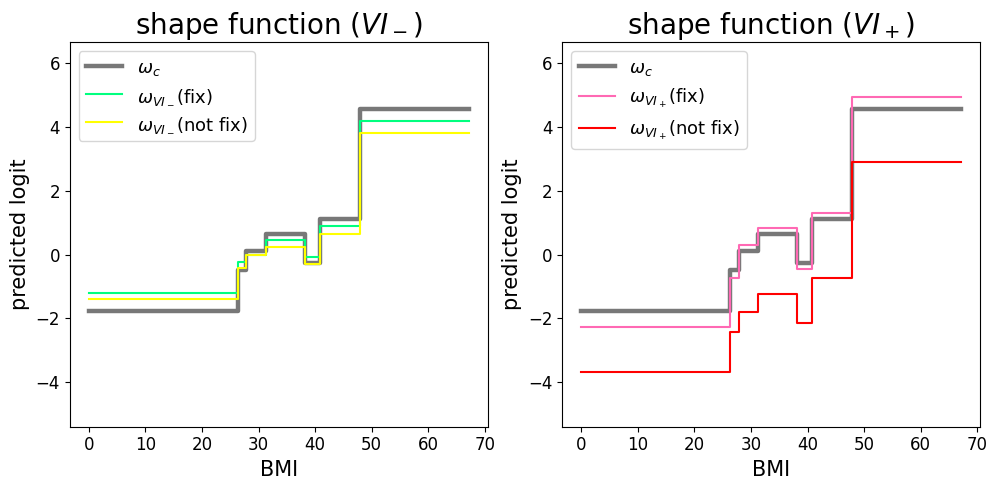

(CVXPY) Jan 20 07:08:00 AM: Your problem has 36 variables, 31 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:00 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:00 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:00 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:00 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:00 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:08:00 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:08:00 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:08:00 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:08:00 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:08:00 AM: Applying reduction SCS
(CVXPY) Jan 20 07:08:00 AM: Finished problem compilation (took 4.427

DiabetesPedigreeFunction
----------------------variable importance Minus----------------------
                                     CVXPY                                     
                                     v1.6.7                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 73, constrai

(CVXPY) Jan 20 07:08:00 AM: Finished problem compilation (took 4.935e-02 seconds).
(CVXPY) Jan 20 07:08:00 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:08:00 AM: Problem status: infeasible
(CVXPY) Jan 20 07:08:00 AM: Optimal value: -inf
(CVXPY) Jan 20 07:08:00 AM: Compilation took 4.935e-02 seconds
(CVXPY) Jan 20 07:08:00 AM: Solver (including time spent in interface) took 7.921e-03 seconds
(CVXPY) Jan 20 07:08:00 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:00 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:00 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:00 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:00 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:00 AM: Compiling problem (target sol

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 30
	  l: linear vars: 7
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:08:00 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:00 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:00 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:00 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:00 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:08:00 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:08:00 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:08:00 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:08:00 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:08:00 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:08:00 AM: Applying reduction SCS
(CVXPY) Jan 20 07:08:00 AM: Finished problem compilation (took 4.714e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 30
	  l: linear vars: 7
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize:

(CVXPY) Jan 20 07:08:00 AM: Applying reduction SCS
(CVXPY) Jan 20 07:08:00 AM: Finished problem compilation (took 4.884e-02 seconds).
(CVXPY) Jan 20 07:08:00 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:08:00 AM: Problem status: infeasible
(CVXPY) Jan 20 07:08:00 AM: Optimal value: -inf
(CVXPY) Jan 20 07:08:00 AM: Compilation took 4.884e-02 seconds
(CVXPY) Jan 20 07:08:00 AM: Solver (including time spent in interface) took 6.711e-03 seconds
(CVXPY) Jan 20 07:08:00 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:00 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:00 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:00 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:00 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 30
	  l: linear vars: 7
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:08:00 AM: Problem status: infeasible
(CVXPY) Jan 20 07:08:00 AM: Optimal value: -inf
(CVXPY) Jan 20 07:08:00 AM: Compilation took 5.224e-02 seconds
(CVXPY) Jan 20 07:08:00 AM: Solver (including time spent in interface) took 7.933e-03 seconds
(CVXPY) Jan 20 07:08:00 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:00 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:00 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:00 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:00 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:00 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:08:00 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:08:00 AM

---------------------------------------------------------------
objective = inf
------------------------------------------------------------------
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
                                     CVXPY                                     
                                     v1.6.7                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-----------------------------------------------------

(CVXPY) Jan 20 07:08:01 AM: Finished problem compilation (took 6.513e-02 seconds).
(CVXPY) Jan 20 07:08:01 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:08:01 AM: Problem status: infeasible
(CVXPY) Jan 20 07:08:01 AM: Optimal value: -inf
(CVXPY) Jan 20 07:08:01 AM: Compilation took 6.513e-02 seconds
(CVXPY) Jan 20 07:08:01 AM: Solver (including time spent in interface) took 1.104e-02 seconds
(CVXPY) Jan 20 07:08:01 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:01 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:01 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:01 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:01 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:01 AM: Compiling problem (target sol

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 30
	  l: linear vars: 7
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:08:01 AM: Finished problem compilation (took 4.803e-02 seconds).
(CVXPY) Jan 20 07:08:01 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:08:01 AM: Problem status: infeasible
(CVXPY) Jan 20 07:08:01 AM: Optimal value: -inf
(CVXPY) Jan 20 07:08:01 AM: Compilation took 4.803e-02 seconds
(CVXPY) Jan 20 07:08:01 AM: Solver (including time spent in interface) took 9.933e-03 seconds
(CVXPY) Jan 20 07:08:01 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:01 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:01 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:01 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:01 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:01 AM: Compiling problem (target sol

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 30
	  l: linear vars: 7
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:08:01 AM: Problem status: infeasible
(CVXPY) Jan 20 07:08:01 AM: Optimal value: -inf
(CVXPY) Jan 20 07:08:01 AM: Compilation took 4.689e-02 seconds
(CVXPY) Jan 20 07:08:01 AM: Solver (including time spent in interface) took 1.582e-02 seconds
(CVXPY) Jan 20 07:08:01 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:01 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:01 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:01 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:01 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:01 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:08:01 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:08:01 AM

  1000| 1.05e-01  1.31e-02  5.94e+00  2.64e+00  3.28e-01  1.39e-02 
  1100| 1.84e+09  6.64e+06  3.21e+18  1.61e+18  3.28e-01  1.50e-02 
------------------------------------------------------------------
status:  infeasible
timings: total: 1.50e-02s = setup: 7.57e-04s + solve: 1.43e-02s
	 lin-sys: 1.14e-02s, cones: 5.28e-04s, accel: 3.12e-04s
------------------------------------------------------------------
objective = inf
------------------------------------------------------------------
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
                                     CVXPY                                     
                                     v1.6.7                                    
-------------------------------------------------------------------------------
                          

(CVXPY) Jan 20 07:08:01 AM: Compilation took 4.828e-02 seconds
(CVXPY) Jan 20 07:08:01 AM: Solver (including time spent in interface) took 1.459e-02 seconds
(CVXPY) Jan 20 07:08:01 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:01 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:01 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:01 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:01 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:01 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:08:01 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:08:01 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:08:01 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 

                                     CVXPY                                     
                                     v1.6.7                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 30
	  l: linear vars: 7
	  q: soc vars: 38

(CVXPY) Jan 20 07:08:02 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:02 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:02 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:02 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:02 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:08:02 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:08:02 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:08:02 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:08:02 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:08:02 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:08:02 AM: Applying reduction SCS
(CVXPY) Jan 20 07:08:02 AM: Finished problem compilation (took 4.824e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 30
	  l: linear vars: 7
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize:

(CVXPY) Jan 20 07:08:02 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:08:02 AM: Applying reduction SCS
(CVXPY) Jan 20 07:08:02 AM: Finished problem compilation (took 6.592e-02 seconds).
(CVXPY) Jan 20 07:08:02 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:08:02 AM: Problem status: infeasible
(CVXPY) Jan 20 07:08:02 AM: Optimal value: -inf
(CVXPY) Jan 20 07:08:02 AM: Compilation took 6.592e-02 seconds
(CVXPY) Jan 20 07:08:02 AM: Solver (including time spent in interface) took 9.996e-03 seconds
(CVXPY) Jan 20 07:08:02 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:02 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:02 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:02 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:02 AM: Your

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 30
	  l: linear vars: 7
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:08:02 AM: Problem status: infeasible
(CVXPY) Jan 20 07:08:02 AM: Optimal value: -inf
(CVXPY) Jan 20 07:08:02 AM: Compilation took 4.799e-02 seconds
(CVXPY) Jan 20 07:08:02 AM: Solver (including time spent in interface) took 8.047e-03 seconds
(CVXPY) Jan 20 07:08:02 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:02 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:02 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:02 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:02 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:02 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:08:02 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:08:02 AM

   250| 2.96e-01  8.52e-03  3.80e+00  1.56e+00  1.44e+00  5.60e-03 
   375| 1.40e+08  2.46e+06  9.43e+18  4.72e+18  1.44e+00  7.24e-03 
------------------------------------------------------------------
status:  infeasible
timings: total: 7.25e-03s = setup: 9.75e-04s + solve: 6.27e-03s
	 lin-sys: 4.27e-03s, cones: 1.86e-04s, accel: 8.92e-05s
------------------------------------------------------------------
objective = inf
------------------------------------------------------------------
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
                                     CVXPY                                     
                                     v1.6.7                                    
-------------------------------------------------------------------------------
                          

(CVXPY) Jan 20 07:08:02 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:02 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:02 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:02 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:02 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:08:02 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:08:02 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:08:02 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:08:02 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:08:02 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:08:02 AM: Applying reduction SCS
(CVXPY) Jan 20 07:08:02 AM: Finished problem compilation (took 4.692e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 30
	  l: linear vars: 7
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize:

(CVXPY) Jan 20 07:08:02 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:08:02 AM: Applying reduction SCS
(CVXPY) Jan 20 07:08:02 AM: Finished problem compilation (took 4.670e-02 seconds).
(CVXPY) Jan 20 07:08:02 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:08:02 AM: Problem status: infeasible
(CVXPY) Jan 20 07:08:02 AM: Optimal value: -inf
(CVXPY) Jan 20 07:08:02 AM: Compilation took 4.670e-02 seconds
(CVXPY) Jan 20 07:08:02 AM: Solver (including time spent in interface) took 7.382e-03 seconds
(CVXPY) Jan 20 07:08:02 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:02 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:02 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:02 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:02 AM: Your

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 30
	  l: linear vars: 7
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:08:03 AM: Finished problem compilation (took 4.912e-02 seconds).
(CVXPY) Jan 20 07:08:03 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:08:03 AM: Problem status: infeasible
(CVXPY) Jan 20 07:08:03 AM: Optimal value: -inf
(CVXPY) Jan 20 07:08:03 AM: Compilation took 4.912e-02 seconds
(CVXPY) Jan 20 07:08:03 AM: Solver (including time spent in interface) took 9.544e-03 seconds
(CVXPY) Jan 20 07:08:03 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:03 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:03 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:03 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:03 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:03 AM: Compiling problem (target sol

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 30
	  l: linear vars: 7
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:08:03 AM: Applying reduction SCS
(CVXPY) Jan 20 07:08:03 AM: Finished problem compilation (took 6.291e-02 seconds).
(CVXPY) Jan 20 07:08:03 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:08:03 AM: Problem status: infeasible
(CVXPY) Jan 20 07:08:03 AM: Optimal value: -inf
(CVXPY) Jan 20 07:08:03 AM: Compilation took 6.291e-02 seconds
(CVXPY) Jan 20 07:08:03 AM: Solver (including time spent in interface) took 1.185e-02 seconds
(CVXPY) Jan 20 07:08:03 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:03 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:03 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:03 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:03 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 30
	  l: linear vars: 7
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:08:03 AM: Applying reduction SCS
(CVXPY) Jan 20 07:08:03 AM: Finished problem compilation (took 6.216e-02 seconds).
(CVXPY) Jan 20 07:08:03 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:08:03 AM: Problem status: infeasible
(CVXPY) Jan 20 07:08:03 AM: Optimal value: -inf
(CVXPY) Jan 20 07:08:03 AM: Compilation took 6.216e-02 seconds
(CVXPY) Jan 20 07:08:03 AM: Solver (including time spent in interface) took 9.193e-03 seconds
(CVXPY) Jan 20 07:08:03 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:03 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:03 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:03 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:03 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 30
	  l: linear vars: 7
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:08:03 AM: Applying reduction SCS
(CVXPY) Jan 20 07:08:03 AM: Finished problem compilation (took 6.158e-02 seconds).
(CVXPY) Jan 20 07:08:03 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:08:03 AM: Problem status: infeasible
(CVXPY) Jan 20 07:08:03 AM: Optimal value: -inf
(CVXPY) Jan 20 07:08:03 AM: Compilation took 6.158e-02 seconds
(CVXPY) Jan 20 07:08:03 AM: Solver (including time spent in interface) took 7.661e-03 seconds
(CVXPY) Jan 20 07:08:03 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:03 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:03 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:03 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:03 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 30
	  l: linear vars: 7
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:08:04 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:08:04 AM: Applying reduction SCS
(CVXPY) Jan 20 07:08:04 AM: Finished problem compilation (took 8.196e-02 seconds).
(CVXPY) Jan 20 07:08:04 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:08:04 AM: Problem status: infeasible
(CVXPY) Jan 20 07:08:04 AM: Optimal value: -inf
(CVXPY) Jan 20 07:08:04 AM: Compilation took 8.196e-02 seconds
(CVXPY) Jan 20 07:08:04 AM: Solver (including time spent in interface) took 1.143e-02 seconds
(CVXPY) Jan 20 07:08:04 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:04 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:04 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:04 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:04 AM: Your

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 30
	  l: linear vars: 7
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:08:04 AM: Applying reduction SCS
(CVXPY) Jan 20 07:08:04 AM: Finished problem compilation (took 5.738e-02 seconds).
(CVXPY) Jan 20 07:08:04 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:08:04 AM: Problem status: infeasible
(CVXPY) Jan 20 07:08:04 AM: Optimal value: -inf
(CVXPY) Jan 20 07:08:04 AM: Compilation took 5.738e-02 seconds
(CVXPY) Jan 20 07:08:04 AM: Solver (including time spent in interface) took 8.143e-03 seconds
(CVXPY) Jan 20 07:08:04 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:04 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:04 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:04 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:04 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 30
	  l: linear vars: 7
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:08:04 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:04 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:04 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:04 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:08:04 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:08:04 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:08:04 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:08:04 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:08:04 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:08:04 AM: Applying reduction SCS
(CVXPY) Jan 20 07:08:04 AM: Finished problem compilation (took 6.423e-02 seconds).
(CVXPY) Jan 20 07:08:04 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 

-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 30
	  l: linear vars: 7
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize:

(CVXPY) Jan 20 07:08:04 AM: Problem status: infeasible
(CVXPY) Jan 20 07:08:04 AM: Optimal value: -inf
(CVXPY) Jan 20 07:08:04 AM: Compilation took 5.180e-02 seconds
(CVXPY) Jan 20 07:08:04 AM: Solver (including time spent in interface) took 3.536e-02 seconds
(CVXPY) Jan 20 07:08:04 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:04 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:04 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:04 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:04 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:04 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:08:04 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:08:04 AM

-----------------------------------
status:  infeasible
timings: total: 3.33e-02s = setup: 8.45e-04s + solve: 3.24e-02s
	 lin-sys: 2.57e-02s, cones: 1.28e-03s, accel: 7.82e-04s
------------------------------------------------------------------
objective = inf
------------------------------------------------------------------
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
                                     CVXPY                                     
                                     v1.6.7                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
---------------------------------

(CVXPY) Jan 20 07:08:04 AM: Problem status: optimal
(CVXPY) Jan 20 07:08:04 AM: Optimal value: 7.729e-01
(CVXPY) Jan 20 07:08:04 AM: Compilation took 4.567e-02 seconds
(CVXPY) Jan 20 07:08:04 AM: Solver (including time spent in interface) took 6.152e-03 seconds
(CVXPY) Jan 20 07:08:04 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:04 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:04 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:04 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:04 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:04 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:08:04 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:08:04 

                                     CVXPY                                     
                                     v1.6.7                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 30
	  l: linear vars: 7
	  q: soc vars: 38

(CVXPY) Jan 20 07:08:05 AM: Problem status: optimal
(CVXPY) Jan 20 07:08:05 AM: Optimal value: 6.967e-01
(CVXPY) Jan 20 07:08:05 AM: Compilation took 6.271e-02 seconds
(CVXPY) Jan 20 07:08:05 AM: Solver (including time spent in interface) took 5.106e-03 seconds
(CVXPY) Jan 20 07:08:05 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:05 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:05 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:05 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:05 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:05 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:08:05 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:08:05 

   175| 3.10e-05  1.13e-06  2.50e-05 -6.97e-01  1.00e-01  4.35e-03 
------------------------------------------------------------------
status:  solved
timings: total: 4.36e-03s = setup: 1.08e-03s + solve: 3.29e-03s
	 lin-sys: 2.26e-03s, cones: 8.46e-05s, accel: 1.08e-04s
------------------------------------------------------------------
objective = -0.696754
------------------------------------------------------------------
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
                                     CVXPY                                     
                                     v1.6.7                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
------------

(CVXPY) Jan 20 07:08:05 AM: Finished problem compilation (took 5.296e-02 seconds).
(CVXPY) Jan 20 07:08:05 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:08:05 AM: Problem status: infeasible
(CVXPY) Jan 20 07:08:05 AM: Optimal value: -inf
(CVXPY) Jan 20 07:08:05 AM: Compilation took 5.296e-02 seconds
(CVXPY) Jan 20 07:08:05 AM: Solver (including time spent in interface) took 7.616e-03 seconds
(CVXPY) Jan 20 07:08:05 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:05 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:05 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:05 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:05 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:05 AM: Compiling problem (target sol

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 30
	  l: linear vars: 7
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:08:05 AM: Finished problem compilation (took 5.137e-02 seconds).
(CVXPY) Jan 20 07:08:05 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:08:05 AM: Problem status: infeasible
(CVXPY) Jan 20 07:08:05 AM: Optimal value: -inf
(CVXPY) Jan 20 07:08:05 AM: Compilation took 5.137e-02 seconds
(CVXPY) Jan 20 07:08:05 AM: Solver (including time spent in interface) took 7.337e-03 seconds
(CVXPY) Jan 20 07:08:05 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:05 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:05 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:05 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:05 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:05 AM: Compiling problem (target sol

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 30
	  l: linear vars: 7
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:08:05 AM: Problem status: infeasible
(CVXPY) Jan 20 07:08:05 AM: Optimal value: -inf
(CVXPY) Jan 20 07:08:05 AM: Compilation took 4.579e-02 seconds
(CVXPY) Jan 20 07:08:05 AM: Solver (including time spent in interface) took 8.960e-03 seconds
(CVXPY) Jan 20 07:08:05 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:05 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:05 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:05 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:05 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:05 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:08:05 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:08:05 AM

   500| 2.48e-01  2.11e-01  1.15e+02  5.74e+01  3.49e-01  7.88e-03 
   525| 6.97e+10  5.05e+08  7.90e+18  3.95e+18  3.49e-01  8.19e-03 
------------------------------------------------------------------
status:  infeasible
timings: total: 8.20e-03s = setup: 7.63e-04s + solve: 7.43e-03s
	 lin-sys: 5.69e-03s, cones: 2.30e-04s, accel: 1.58e-04s
------------------------------------------------------------------
objective = inf
------------------------------------------------------------------
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
                                     CVXPY                                     
                                     v1.6.7                                    
-------------------------------------------------------------------------------
                          

(CVXPY) Jan 20 07:08:06 AM: Applying reduction SCS
(CVXPY) Jan 20 07:08:06 AM: Finished problem compilation (took 3.336e-01 seconds).
(CVXPY) Jan 20 07:08:06 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:08:06 AM: Problem status: infeasible
(CVXPY) Jan 20 07:08:06 AM: Optimal value: -inf
(CVXPY) Jan 20 07:08:06 AM: Compilation took 3.336e-01 seconds
(CVXPY) Jan 20 07:08:06 AM: Solver (including time spent in interface) took 6.685e-03 seconds
(CVXPY) Jan 20 07:08:06 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:06 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:06 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:06 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:06 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 30
	  l: linear vars: 7
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:08:06 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:08:06 AM: Problem status: infeasible
(CVXPY) Jan 20 07:08:06 AM: Optimal value: -inf
(CVXPY) Jan 20 07:08:06 AM: Compilation took 4.668e-02 seconds
(CVXPY) Jan 20 07:08:06 AM: Solver (including time spent in interface) took 6.560e-03 seconds
(CVXPY) Jan 20 07:08:06 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:06 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:06 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:06 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:06 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:06 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:08:06 AM: Reduction chain: FlipObjective -> Dcp2Cone ->

------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 30
	  l: linear vars: 7
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
------------------------------------------------------------------
     0| 7.99e+00  7.64e-01  2.70e+00 -1.69e+00  1.00e-01  1.18e-03 
   250| 3.86e-01  6.88e-03  3.95e+00  1.80e+00  3.20e-01  4.34e-03 
   375

(CVXPY) Jan 20 07:08:06 AM: Finished problem compilation (took 6.205e-02 seconds).
(CVXPY) Jan 20 07:08:06 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:08:06 AM: Problem status: infeasible
(CVXPY) Jan 20 07:08:06 AM: Optimal value: -inf
(CVXPY) Jan 20 07:08:06 AM: Compilation took 6.205e-02 seconds
(CVXPY) Jan 20 07:08:06 AM: Solver (including time spent in interface) took 8.255e-03 seconds
(CVXPY) Jan 20 07:08:06 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:06 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:06 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:06 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:06 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:06 AM: Compiling problem (target sol

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 30
	  l: linear vars: 7
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:08:06 AM: Applying reduction SCS
(CVXPY) Jan 20 07:08:06 AM: Finished problem compilation (took 6.193e-02 seconds).
(CVXPY) Jan 20 07:08:06 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:08:06 AM: Problem status: infeasible
(CVXPY) Jan 20 07:08:06 AM: Optimal value: -inf
(CVXPY) Jan 20 07:08:06 AM: Compilation took 6.193e-02 seconds
(CVXPY) Jan 20 07:08:06 AM: Solver (including time spent in interface) took 9.123e-03 seconds
(CVXPY) Jan 20 07:08:06 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:06 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:06 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:06 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:06 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 30
	  l: linear vars: 7
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:08:07 AM: Problem status: infeasible
(CVXPY) Jan 20 07:08:07 AM: Optimal value: -inf
(CVXPY) Jan 20 07:08:07 AM: Compilation took 5.269e-02 seconds
(CVXPY) Jan 20 07:08:07 AM: Solver (including time spent in interface) took 5.167e-01 seconds
(CVXPY) Jan 20 07:08:07 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:07 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:07 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:07 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:07 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:07 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:08:07 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:08:07 AM

 38000| 2.12e-03  5.72e-03  3.11e+00  1.09e+00  3.18e-01  5.12e-01 
 38175| 1.54e+10  8.53e+08  2.95e+16  1.47e+16  3.18e-01  5.16e-01 
------------------------------------------------------------------
status:  infeasible
timings: total: 5.16e-01s = setup: 1.09e-03s + solve: 5.15e-01s
	 lin-sys: 4.30e-01s, cones: 2.02e-02s, accel: 1.37e-02s
------------------------------------------------------------------
objective = inf
------------------------------------------------------------------
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
                                     CVXPY                                     
                                     v1.6.7                                    
-------------------------------------------------------------------------------
                          

(CVXPY) Jan 20 07:08:07 AM: Finished problem compilation (took 5.692e-02 seconds).
(CVXPY) Jan 20 07:08:07 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:08:07 AM: Problem status: infeasible
(CVXPY) Jan 20 07:08:07 AM: Optimal value: -inf
(CVXPY) Jan 20 07:08:07 AM: Compilation took 5.692e-02 seconds
(CVXPY) Jan 20 07:08:07 AM: Solver (including time spent in interface) took 1.742e-01 seconds
(CVXPY) Jan 20 07:08:07 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.


-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 30
	  l: linear vars: 7
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:08:07 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:07 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:07 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:07 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:07 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:08:07 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:08:07 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:08:07 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:08:07 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:08:07 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:08:07 AM: Applying reduction SCS
(CVXPY) Jan 20 07:08:07 AM: Finished problem compilation (took 5.932e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 30
	  l: linear vars: 7
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize:

(CVXPY) Jan 20 07:08:08 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:08 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:08 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:08 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:08 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:08:08 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:08:08 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:08:08 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:08:08 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:08:08 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:08:08 AM: Applying reduction SCS
(CVXPY) Jan 20 07:08:08 AM: Finished problem compilation (took 3.094e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 45
cones: 	  l: linear vars: 7
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_loo

(CVXPY) Jan 20 07:08:08 AM: Problem status: infeasible
(CVXPY) Jan 20 07:08:08 AM: Optimal value: -inf
(CVXPY) Jan 20 07:08:08 AM: Compilation took 2.859e-02 seconds
(CVXPY) Jan 20 07:08:08 AM: Solver (including time spent in interface) took 3.111e-03 seconds
(CVXPY) Jan 20 07:08:08 AM: Your problem has 36 variables, 7 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:08 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:08 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:08 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:08 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:08 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:08:08 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:08:08 AM:

                                     CVXPY                                     
                                     v1.6.7                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 45
cones: 	  l: linear vars: 7
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, 

(CVXPY) Jan 20 07:08:08 AM: Finished problem compilation (took 2.637e-02 seconds).
(CVXPY) Jan 20 07:08:08 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:08:08 AM: Problem status: infeasible
(CVXPY) Jan 20 07:08:08 AM: Optimal value: -inf
(CVXPY) Jan 20 07:08:08 AM: Compilation took 2.637e-02 seconds
(CVXPY) Jan 20 07:08:08 AM: Solver (including time spent in interface) took 4.236e-03 seconds
(CVXPY) Jan 20 07:08:08 AM: Your problem has 36 variables, 7 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:08 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:08 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:08 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:08 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:08 AM: Compiling problem (target solv

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 45
cones: 	  l: linear vars: 7
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1305, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
--------

(CVXPY) Jan 20 07:08:08 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:08:08 AM: Applying reduction SCS
(CVXPY) Jan 20 07:08:08 AM: Finished problem compilation (took 3.927e-02 seconds).
(CVXPY) Jan 20 07:08:08 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:08:08 AM: Problem status: infeasible
(CVXPY) Jan 20 07:08:08 AM: Optimal value: -inf
(CVXPY) Jan 20 07:08:08 AM: Compilation took 3.927e-02 seconds
(CVXPY) Jan 20 07:08:08 AM: Solver (including time spent in interface) took 4.055e-03 seconds
(CVXPY) Jan 20 07:08:08 AM: Your problem has 36 variables, 7 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:08 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:08 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:08 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:08 AM: Your 

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 45
cones: 	  l: linear vars: 7
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1305, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
--------

(CVXPY) Jan 20 07:08:09 AM: Problem status: infeasible
(CVXPY) Jan 20 07:08:09 AM: Optimal value: -inf
(CVXPY) Jan 20 07:08:09 AM: Compilation took 2.796e-02 seconds
(CVXPY) Jan 20 07:08:09 AM: Solver (including time spent in interface) took 2.091e-01 seconds
(CVXPY) Jan 20 07:08:09 AM: Your problem has 36 variables, 7 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:09 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:09 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:09 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:09 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:09 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:08:09 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:08:09 AM:

 12500| 4.88e+10  2.21e+10  2.41e+16  1.20e+16  1.00e-01  1.37e-01 
 12750| 5.01e+10  2.26e+10  2.41e+16  1.20e+16  1.00e-01  1.40e-01 
 13000| 5.12e+10  2.31e+10  2.41e+16  1.20e+16  1.00e-01  1.43e-01 
 13250| 5.27e+10  2.38e+10  2.41e+16  1.20e+16  1.00e-01  1.48e-01 
 13500| 5.40e+10  2.44e+10  2.40e+16  1.20e+16  1.00e-01  1.51e-01 
 13750| 1.74e+11  2.36e+10  2.42e+16  1.21e+16  1.00e-01  1.53e-01 
 14000| 5.73e+10  2.59e+10  2.40e+16  1.20e+16  1.00e-01  1.56e-01 
 14250| 5.90e+10  2.67e+10  2.40e+16  1.20e+16  1.00e-01  1.58e-01 
 14500| 6.10e+10  2.76e+10  2.40e+16  1.20e+16  1.00e-01  1.61e-01 
 14750| 6.33e+10  2.86e+10  2.40e+16  1.20e+16  1.00e-01  1.63e-01 
 15000| 6.58e+10  2.97e+10  2.40e+16  1.20e+16  1.00e-01  1.66e-01 
 15250| 6.86e+10  3.10e+10  2.40e+16  1.20e+16  1.00e-01  1.69e-01 
 15500| 7.17e+10  3.24e+10  2.40e+16  1.20e+16  1.00e-01  1.73e-01 
 15750| 7.53e+10  3.41e+10  2.40e+16  1.20e+16  1.00e-01  1.75e-01 
 16000| 7.99e+10  3.61e+10  2.40e+16  1.20e+16  

(CVXPY) Jan 20 07:08:09 AM: Your problem has 36 variables, 7 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:09 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:09 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:09 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:09 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:09 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:08:09 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:08:09 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:08:09 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:08:09 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:08:09 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:08:09 AM: Applying reduc

                                     CVXPY                                     
                                     v1.6.7                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 45
cones: 	  l: linear vars: 7
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, 

(CVXPY) Jan 20 07:08:09 AM: Problem status: optimal
(CVXPY) Jan 20 07:08:09 AM: Optimal value: 1.245e+00
(CVXPY) Jan 20 07:08:09 AM: Compilation took 2.538e-02 seconds
(CVXPY) Jan 20 07:08:09 AM: Solver (including time spent in interface) took 1.356e-02 seconds
(CVXPY) Jan 20 07:08:09 AM: Your problem has 36 variables, 7 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:09 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:09 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:09 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:09 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:09 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:08:09 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:08:09 A

   500| 2.41e-02  8.64e-04  5.08e-03 -1.28e+00  1.00e-01  7.88e-03 
   750| 1.52e-03  9.94e-06  1.22e-04 -1.25e+00  1.00e-01  1.09e-02 
   925| 5.91e-05  3.20e-06  2.75e-06 -1.25e+00  1.00e-01  1.28e-02 
------------------------------------------------------------------
status:  solved
timings: total: 1.28e-02s = setup: 7.82e-04s + solve: 1.20e-02s
	 lin-sys: 8.84e-03s, cones: 6.93e-04s, accel: 2.83e-04s
------------------------------------------------------------------
objective = -1.245001
------------------------------------------------------------------
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
                                     CVXPY                                     
                                     v1.6.7                                    
------------------------------------

(CVXPY) Jan 20 07:08:09 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:08:09 AM: Problem status: infeasible
(CVXPY) Jan 20 07:08:09 AM: Optimal value: -inf
(CVXPY) Jan 20 07:08:09 AM: Compilation took 2.791e-02 seconds
(CVXPY) Jan 20 07:08:09 AM: Solver (including time spent in interface) took 3.500e-03 seconds
(CVXPY) Jan 20 07:08:09 AM: Your problem has 36 variables, 7 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:09 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:09 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:09 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:09 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:09 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:08:09 AM: Reduction chain: FlipObjective -> Dcp2Cone -> 

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 45
cones: 	  l: linear vars: 7
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1305, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
--------

(CVXPY) Jan 20 07:08:09 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:09 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:09 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:09 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:09 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:08:09 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:08:09 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:08:09 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:08:09 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:08:09 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:08:09 AM: Applying reduction SCS
(CVXPY) Jan 20 07:08:09 AM: Finished problem compilation (took 2.542e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 45
cones: 	  l: linear vars: 7
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_loo

(CVXPY) Jan 20 07:08:10 AM: Applying reduction SCS
(CVXPY) Jan 20 07:08:10 AM: Finished problem compilation (took 2.654e-02 seconds).
(CVXPY) Jan 20 07:08:10 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:08:10 AM: Problem status: infeasible
(CVXPY) Jan 20 07:08:10 AM: Optimal value: -inf
(CVXPY) Jan 20 07:08:10 AM: Compilation took 2.654e-02 seconds
(CVXPY) Jan 20 07:08:10 AM: Solver (including time spent in interface) took 7.488e-03 seconds
(CVXPY) Jan 20 07:08:10 AM: Your problem has 36 variables, 7 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:10 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:10 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:10 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:10 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY)

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 45
cones: 	  l: linear vars: 7
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1305, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
--------

(CVXPY) Jan 20 07:08:10 AM: Applying reduction SCS
(CVXPY) Jan 20 07:08:10 AM: Finished problem compilation (took 2.744e-02 seconds).
(CVXPY) Jan 20 07:08:10 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:08:10 AM: Problem status: infeasible
(CVXPY) Jan 20 07:08:10 AM: Optimal value: -inf
(CVXPY) Jan 20 07:08:10 AM: Compilation took 2.744e-02 seconds
(CVXPY) Jan 20 07:08:10 AM: Solver (including time spent in interface) took 3.747e-03 seconds
(CVXPY) Jan 20 07:08:10 AM: Your problem has 36 variables, 7 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:10 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:10 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:10 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:10 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY)

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 45
cones: 	  l: linear vars: 7
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1305, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
--------

(CVXPY) Jan 20 07:08:10 AM: Your problem has 36 variables, 7 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:10 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:10 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:10 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:10 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:10 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:08:10 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:08:10 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:08:10 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:08:10 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:08:10 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:08:10 AM: Applying reduc

-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 45
cones: 	  l: linear vars: 7
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_loo

(CVXPY) Jan 20 07:08:10 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:10 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:10 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:10 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:08:10 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:08:10 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:08:10 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:08:10 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:08:10 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:08:10 AM: Applying reduction SCS
(CVXPY) Jan 20 07:08:10 AM: Finished problem compilation (took 2.654e-02 seconds).
(CVXPY) Jan 20 07:08:10 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 

-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 45
cones: 	  l: linear vars: 7
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_loo

(CVXPY) Jan 20 07:08:10 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:10 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:10 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:10 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:10 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:08:10 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:08:10 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:08:10 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:08:10 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:08:10 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:08:10 AM: Applying reduction SCS
(CVXPY) Jan 20 07:08:10 AM: Finished problem compilation (took 2.424e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 45
cones: 	  l: linear vars: 7
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_loo

(CVXPY) Jan 20 07:08:11 AM: Applying reduction SCS
(CVXPY) Jan 20 07:08:11 AM: Finished problem compilation (took 2.657e-02 seconds).
(CVXPY) Jan 20 07:08:11 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:08:11 AM: Problem status: infeasible
(CVXPY) Jan 20 07:08:11 AM: Optimal value: -inf
(CVXPY) Jan 20 07:08:11 AM: Compilation took 2.657e-02 seconds
(CVXPY) Jan 20 07:08:11 AM: Solver (including time spent in interface) took 3.768e-03 seconds
(CVXPY) Jan 20 07:08:11 AM: Your problem has 36 variables, 7 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:11 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:11 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:11 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:11 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY)

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 45
cones: 	  l: linear vars: 7
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1305, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
--------

(CVXPY) Jan 20 07:08:11 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:08:11 AM: Problem status: optimal
(CVXPY) Jan 20 07:08:11 AM: Optimal value: 1.989e+00
(CVXPY) Jan 20 07:08:11 AM: Compilation took 2.580e-02 seconds
(CVXPY) Jan 20 07:08:11 AM: Solver (including time spent in interface) took 1.103e-02 seconds
(CVXPY) Jan 20 07:08:11 AM: Your problem has 36 variables, 7 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:11 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:11 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:11 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:11 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:11 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:08:11 AM: Reduction chain: FlipObjective -> Dcp2Cone -

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 45
cones: 	  l: linear vars: 7
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1305, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
--------

(CVXPY) Jan 20 07:08:11 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:11 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:11 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:11 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:11 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:08:11 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:08:11 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:08:11 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:08:11 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:08:11 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:08:11 AM: Applying reduction SCS
(CVXPY) Jan 20 07:08:11 AM: Finished problem compilation (took 2.348e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 45
cones: 	  l: linear vars: 7
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_loo

(CVXPY) Jan 20 07:08:11 AM: Finished problem compilation (took 2.413e-02 seconds).
(CVXPY) Jan 20 07:08:11 AM: Invoking solver SCS  to obtain a solution.


-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 45
cones: 	  l: linear vars: 7
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1305, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
--------

(CVXPY) Jan 20 07:08:11 AM: Problem status: infeasible
(CVXPY) Jan 20 07:08:11 AM: Optimal value: -inf
(CVXPY) Jan 20 07:08:11 AM: Compilation took 2.413e-02 seconds
(CVXPY) Jan 20 07:08:11 AM: Solver (including time spent in interface) took 2.253e-01 seconds
(CVXPY) Jan 20 07:08:11 AM: Your problem has 36 variables, 7 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:11 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:11 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:11 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:11 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:11 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:08:11 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:08:11 AM:

 19000| 1.43e+10  6.48e+09  1.12e+16  5.62e+15  1.00e-01  2.01e-01 
 19250| 1.55e+10  7.01e+09  1.12e+16  5.62e+15  1.00e-01  2.04e-01 
 19500| 1.56e+10  7.05e+09  1.12e+16  5.62e+15  1.00e-01  2.06e-01 
 19750| 1.74e+10  7.86e+09  1.12e+16  5.62e+15  1.00e-01  2.09e-01 
 20000| 1.96e+10  8.87e+09  1.12e+16  5.62e+15  1.00e-01  2.11e-01 
 20250| 2.27e+10  1.03e+10  1.12e+16  5.62e+15  1.00e-01  2.14e-01 
 20500| 3.63e+10  1.27e+10  1.12e+16  5.62e+15  1.00e-01  2.17e-01 
 20750| 3.26e+10  1.48e+10  1.12e+16  5.62e+15  1.00e-01  2.19e-01 
 21000| 4.76e+10  2.15e+10  1.12e+16  5.62e+15  1.00e-01  2.22e-01 
 21250| 3.05e+10  3.82e+09  1.12e+16  5.61e+15  1.00e-01  2.24e-01 
 21275| 1.97e+08  1.36e+05  1.12e+16  5.61e+15  1.00e-01  2.25e-01 
------------------------------------------------------------------
status:  infeasible
timings: total: 2.25e-01s = setup: 7.99e-04s + solve: 2.24e-01s
	 lin-sys: 1.87e-01s, cones: 7.57e-03s, accel: 5.03e-03s
--------------------------------------------

(CVXPY) Jan 20 07:08:12 AM: Finished problem compilation (took 2.492e-02 seconds).
(CVXPY) Jan 20 07:08:12 AM: Invoking solver SCS  to obtain a solution.


-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 45
cones: 	  l: linear vars: 7
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1305, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
--------

(CVXPY) Jan 20 07:08:12 AM: Problem status: infeasible
(CVXPY) Jan 20 07:08:12 AM: Optimal value: -inf
(CVXPY) Jan 20 07:08:12 AM: Compilation took 2.492e-02 seconds
(CVXPY) Jan 20 07:08:12 AM: Solver (including time spent in interface) took 3.472e-01 seconds
(CVXPY) Jan 20 07:08:12 AM: Your problem has 36 variables, 7 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:12 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:12 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:12 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:12 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:12 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:08:12 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:08:12 AM:

 17750| 3.15e+10  1.43e+10  4.69e+16  2.34e+16  1.00e-01  2.02e-01 
 18000| 3.19e+10  1.44e+10  4.69e+16  2.34e+16  1.00e-01  2.04e-01 
 18250| 3.23e+10  1.46e+10  4.69e+16  2.34e+16  1.00e-01  2.07e-01 
 18500| 3.24e+10  1.47e+10  4.69e+16  2.34e+16  1.00e-01  2.09e-01 
 18750| 3.29e+10  1.49e+10  4.69e+16  2.34e+16  1.00e-01  2.12e-01 
 19000| 3.31e+10  1.50e+10  4.69e+16  2.34e+16  1.00e-01  2.15e-01 
 19250| 3.23e+10  1.19e+10  4.71e+16  2.36e+16  1.00e-01  2.18e-01 
 19500| 3.38e+10  1.53e+10  4.68e+16  2.34e+16  1.00e-01  2.20e-01 
 19750| 3.40e+10  1.54e+10  4.68e+16  2.34e+16  1.00e-01  2.23e-01 
 20000| 3.46e+10  1.56e+10  4.68e+16  2.34e+16  1.00e-01  2.26e-01 
 20250| 3.50e+10  1.58e+10  4.68e+16  2.34e+16  1.00e-01  2.28e-01 
 20500| 3.53e+10  1.59e+10  4.68e+16  2.34e+16  1.00e-01  2.31e-01 
 20750| 3.56e+10  1.61e+10  4.68e+16  2.34e+16  1.00e-01  2.33e-01 
 21000| 3.63e+10  1.64e+10  4.68e+16  2.34e+16  1.00e-01  2.36e-01 
 21250| 3.68e+10  1.66e+10  4.68e+16  2.34e+16  

(CVXPY) Jan 20 07:08:12 AM: Problem status: infeasible
(CVXPY) Jan 20 07:08:12 AM: Optimal value: -inf
(CVXPY) Jan 20 07:08:12 AM: Compilation took 2.461e-02 seconds
(CVXPY) Jan 20 07:08:12 AM: Solver (including time spent in interface) took 3.835e-03 seconds
(CVXPY) Jan 20 07:08:12 AM: Your problem has 36 variables, 7 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:12 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:12 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:12 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:12 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:12 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:08:12 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:08:12 AM:

------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 45
cones: 	  l: linear vars: 7
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1305, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
------------------------------------------------------------------
     0| 2.18e+00  4.23e-01  6.08e+00 -3.07e+00  1.00e-01  1.25e-03 
   100| 2.80e+11  1.71e+09  3.09e+17  1.55e+17  1.00e-01  3.09e-03 
---------------------------------------------

(CVXPY) Jan 20 07:08:12 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:12 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:12 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:12 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:12 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:08:12 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:08:12 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:08:12 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:08:12 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:08:12 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:08:12 AM: Applying reduction SCS
(CVXPY) Jan 20 07:08:12 AM: Finished problem compilation (took 2.569e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 45
cones: 	  l: linear vars: 7
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_loo

(CVXPY) Jan 20 07:08:12 AM: Finished problem compilation (took 2.427e-02 seconds).
(CVXPY) Jan 20 07:08:12 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:08:13 AM: Problem status: infeasible
(CVXPY) Jan 20 07:08:13 AM: Optimal value: -inf
(CVXPY) Jan 20 07:08:13 AM: Compilation took 2.427e-02 seconds
(CVXPY) Jan 20 07:08:13 AM: Solver (including time spent in interface) took 7.393e-02 seconds
(CVXPY) Jan 20 07:08:13 AM: Your problem has 36 variables, 7 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:13 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:13 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:13 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:13 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:13 AM: Compiling problem (target solv

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 45
cones: 	  l: linear vars: 7
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1305, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
--------

(CVXPY) Jan 20 07:08:13 AM: Optimal value: -inf
(CVXPY) Jan 20 07:08:13 AM: Compilation took 2.750e-02 seconds
(CVXPY) Jan 20 07:08:13 AM: Solver (including time spent in interface) took 4.666e-03 seconds
(CVXPY) Jan 20 07:08:13 AM: Your problem has 36 variables, 7 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:13 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:13 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:13 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:13 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:13 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:08:13 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:08:13 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:08:

                                     CVXPY                                     
                                     v1.6.7                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 45
cones: 	  l: linear vars: 7
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, 

(CVXPY) Jan 20 07:08:13 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:13 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:13 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:13 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:13 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:08:13 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:08:13 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:08:13 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:08:13 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:08:13 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:08:13 AM: Applying reduction SCS
(CVXPY) Jan 20 07:08:13 AM: Finished problem compilation (took 3.678e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 45
cones: 	  l: linear vars: 7
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_loo

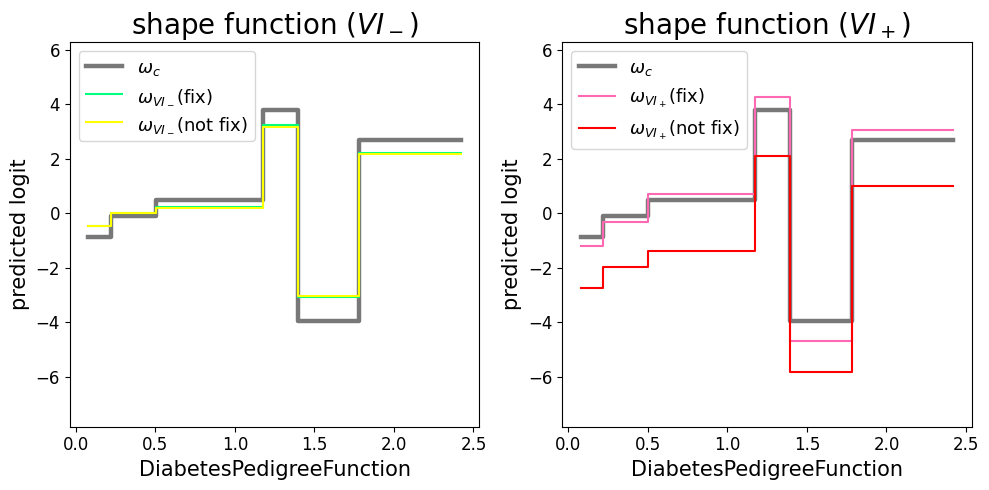

(CVXPY) Jan 20 07:08:14 AM: Your problem has 36 variables, 33 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:14 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:14 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:14 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:14 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:14 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:08:14 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:08:14 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:08:14 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:08:14 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:08:14 AM: Applying reduction SCS
(CVXPY) Jan 20 07:08:14 AM: Finished problem compilation (took 4.230

Age
----------------------variable importance Minus----------------------
                                     CVXPY                                     
                                     v1.6.7                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 73, constraints m: 143
cones: 	  

(CVXPY) Jan 20 07:08:14 AM: Finished problem compilation (took 5.319e-02 seconds).
(CVXPY) Jan 20 07:08:14 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:08:14 AM: Problem status: infeasible
(CVXPY) Jan 20 07:08:14 AM: Optimal value: -inf
(CVXPY) Jan 20 07:08:14 AM: Compilation took 5.319e-02 seconds
(CVXPY) Jan 20 07:08:14 AM: Solver (including time spent in interface) took 6.299e-03 seconds
(CVXPY) Jan 20 07:08:14 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:14 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:14 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:14 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:14 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:14 AM: Compiling problem (target sol

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 32
	  l: linear vars: 5
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:08:14 AM: Finished problem compilation (took 6.010e-02 seconds).
(CVXPY) Jan 20 07:08:14 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:08:14 AM: Problem status: infeasible
(CVXPY) Jan 20 07:08:14 AM: Optimal value: -inf
(CVXPY) Jan 20 07:08:14 AM: Compilation took 6.010e-02 seconds
(CVXPY) Jan 20 07:08:14 AM: Solver (including time spent in interface) took 8.872e-03 seconds
(CVXPY) Jan 20 07:08:14 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:14 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:14 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:14 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:14 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:14 AM: Compiling problem (target sol

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 32
	  l: linear vars: 5
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:08:14 AM: Problem status: infeasible
(CVXPY) Jan 20 07:08:14 AM: Optimal value: -inf
(CVXPY) Jan 20 07:08:14 AM: Compilation took 4.826e-02 seconds
(CVXPY) Jan 20 07:08:14 AM: Solver (including time spent in interface) took 2.354e-02 seconds
(CVXPY) Jan 20 07:08:14 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:14 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:14 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:14 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:14 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:14 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:08:14 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:08:14 AM

  1750| 5.52e+08  1.80e+07  1.16e+18  5.79e+17  1.08e+00  2.28e-02 
------------------------------------------------------------------
status:  infeasible
timings: total: 2.28e-02s = setup: 7.24e-04s + solve: 2.21e-02s
	 lin-sys: 1.79e-02s, cones: 8.17e-04s, accel: 4.49e-04s
------------------------------------------------------------------
objective = inf
------------------------------------------------------------------
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
                                     CVXPY                                     
                                     v1.6.7                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
--------------

(CVXPY) Jan 20 07:08:14 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:14 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:14 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:14 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:14 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:08:14 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:08:14 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:08:14 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:08:14 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:08:14 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:08:14 AM: Applying reduction SCS
(CVXPY) Jan 20 07:08:14 AM: Finished problem compilation (took 4.601e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 32
	  l: linear vars: 5
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize:

(CVXPY) Jan 20 07:08:15 AM: Applying reduction SCS
(CVXPY) Jan 20 07:08:15 AM: Finished problem compilation (took 5.060e-02 seconds).
(CVXPY) Jan 20 07:08:15 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:08:15 AM: Problem status: infeasible
(CVXPY) Jan 20 07:08:15 AM: Optimal value: -inf
(CVXPY) Jan 20 07:08:15 AM: Compilation took 5.060e-02 seconds
(CVXPY) Jan 20 07:08:15 AM: Solver (including time spent in interface) took 6.526e-03 seconds
(CVXPY) Jan 20 07:08:15 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:15 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:15 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:15 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:15 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 32
	  l: linear vars: 5
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:08:15 AM: Applying reduction SCS
(CVXPY) Jan 20 07:08:15 AM: Finished problem compilation (took 5.897e-02 seconds).
(CVXPY) Jan 20 07:08:15 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:08:15 AM: Problem status: infeasible
(CVXPY) Jan 20 07:08:15 AM: Optimal value: -inf
(CVXPY) Jan 20 07:08:15 AM: Compilation took 5.897e-02 seconds
(CVXPY) Jan 20 07:08:15 AM: Solver (including time spent in interface) took 7.325e-03 seconds
(CVXPY) Jan 20 07:08:15 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:15 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:15 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:15 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:15 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 32
	  l: linear vars: 5
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:08:15 AM: Applying reduction SCS
(CVXPY) Jan 20 07:08:15 AM: Finished problem compilation (took 6.580e-02 seconds).
(CVXPY) Jan 20 07:08:15 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:08:15 AM: Problem status: infeasible
(CVXPY) Jan 20 07:08:15 AM: Optimal value: -inf
(CVXPY) Jan 20 07:08:15 AM: Compilation took 6.580e-02 seconds
(CVXPY) Jan 20 07:08:15 AM: Solver (including time spent in interface) took 9.140e-03 seconds
(CVXPY) Jan 20 07:08:15 AM: Your problem has 36 variables, 37 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:15 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:15 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:15 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:15 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 75
cones: 	  z: primal zero / dual free vars: 32
	  l: linear vars: 5
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1335, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   

(CVXPY) Jan 20 07:08:15 AM: Problem status: infeasible
(CVXPY) Jan 20 07:08:15 AM: Optimal value: -inf
(CVXPY) Jan 20 07:08:15 AM: Compilation took 4.794e-02 seconds
(CVXPY) Jan 20 07:08:15 AM: Solver (including time spent in interface) took 8.808e-03 seconds
(CVXPY) Jan 20 07:08:15 AM: Your problem has 36 variables, 5 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:15 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:15 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:15 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:15 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:15 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:08:15 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:08:15 AM:

   475| 5.63e+11  2.37e+10  5.28e+18  2.64e+18  1.39e+00  8.10e-03 
------------------------------------------------------------------
status:  infeasible
timings: total: 8.11e-03s = setup: 7.99e-04s + solve: 7.31e-03s
	 lin-sys: 4.56e-03s, cones: 2.10e-04s, accel: 1.29e-04s
------------------------------------------------------------------
objective = inf
------------------------------------------------------------------
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
time: 1.6065888404846191
log obj: 0.37657861785144364 rset_bound: 0.37657937589518325
                                     CVXPY                                     
                                     v1.6.7                                    
-------------------------------------------------------------------------------
        

(CVXPY) Jan 20 07:08:16 AM: Problem status: infeasible
(CVXPY) Jan 20 07:08:16 AM: Optimal value: -inf
(CVXPY) Jan 20 07:08:16 AM: Compilation took 2.534e-02 seconds
(CVXPY) Jan 20 07:08:16 AM: Solver (including time spent in interface) took 7.758e-01 seconds
(CVXPY) Jan 20 07:08:16 AM: Your problem has 36 variables, 5 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:16 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:16 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:16 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:16 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:16 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:08:16 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:08:16 AM:

 58500| 1.01e+00  9.05e-07  1.61e+06  8.03e+05  1.00e-01  6.16e-01 
 58750| 9.55e+00  3.96e-05  6.70e+05  3.35e+05  1.00e-01  6.18e-01 
 59000| 1.01e+00  1.44e-06  1.62e+06  8.12e+05  1.00e-01  6.21e-01 
 59250| 1.01e+00  1.02e-06  1.65e+06  8.26e+05  1.00e-01  6.23e-01 
 59500| 3.37e-01  3.22e-04  1.57e+06  7.87e+05  1.00e-01  6.26e-01 
 59750| 1.96e-01  1.01e-05  1.60e+06  8.01e+05  1.00e-01  6.31e-01 
 60000| 2.38e-01  2.82e-05  1.65e+06  8.25e+05  1.00e-01  6.33e-01 
 60250| 3.00e-01  4.95e-04  1.69e+06  8.43e+05  1.00e-01  6.37e-01 
 60500| 2.72e-01  2.78e-04  1.62e+06  8.08e+05  1.00e-01  6.41e-01 
 60750| 4.81e-01  1.11e-03  1.68e+06  8.39e+05  1.00e-01  6.43e-01 
 61000| 2.00e-01  1.56e-04  1.63e+06  8.13e+05  1.00e-01  6.47e-01 
 61250| 2.16e-01  1.30e-04  1.63e+06  8.17e+05  1.00e-01  6.50e-01 
 61500| 2.19e+00  3.01e-03  1.20e+06  5.99e+05  1.00e-01  6.53e-01 
 61750| 3.06e-01  4.12e-04  1.63e+06  8.17e+05  1.00e-01  6.57e-01 
 62000| 2.57e-01  1.95e-04  1.59e+06  7.94e+05  

(CVXPY) Jan 20 07:08:16 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:08:16 AM: Applying reduction SCS
(CVXPY) Jan 20 07:08:16 AM: Finished problem compilation (took 2.707e-02 seconds).
(CVXPY) Jan 20 07:08:16 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:08:16 AM: Problem status: infeasible
(CVXPY) Jan 20 07:08:16 AM: Optimal value: -inf
(CVXPY) Jan 20 07:08:16 AM: Compilation took 2.707e-02 seconds
(CVXPY) Jan 20 07:08:16 AM: Solver (including time spent in interface) took 3.944e-03 seconds
(CVXPY) Jan 20 07:08:16 AM: Your problem has 36 variables, 5 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:16 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:16 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:16 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:16 AM: Your 

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 43
cones: 	  l: linear vars: 5
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1303, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
--------

(CVXPY) Jan 20 07:08:17 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:17 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:17 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:17 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:17 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:08:17 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:08:17 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:08:17 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:08:17 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:08:17 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:08:17 AM: Applying reduction SCS
(CVXPY) Jan 20 07:08:17 AM: Finished problem compilation (took 2.169e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 43
cones: 	  l: linear vars: 5
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_loo

(CVXPY) Jan 20 07:08:17 AM: Finished problem compilation (took 2.371e-02 seconds).
(CVXPY) Jan 20 07:08:17 AM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jan 20 07:08:17 AM: Problem status: infeasible
(CVXPY) Jan 20 07:08:17 AM: Optimal value: -inf
(CVXPY) Jan 20 07:08:17 AM: Compilation took 2.371e-02 seconds
(CVXPY) Jan 20 07:08:17 AM: Solver (including time spent in interface) took 4.631e-03 seconds
(CVXPY) Jan 20 07:08:17 AM: Your problem has 36 variables, 5 constraints, and 0 parameters.
(CVXPY) Jan 20 07:08:17 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:17 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:17 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:17 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:17 AM: Compiling problem (target solv

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 43
cones: 	  l: linear vars: 5
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1303, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
--------

(CVXPY) Jan 20 07:08:17 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:08:17 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:08:17 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:08:17 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:08:17 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:08:17 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:08:17 AM: Applying reduction FlipObjective
(CVXPY) Jan 20 07:08:17 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:08:17 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:08:17 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:08:17 AM: Applying reduction SCS
(CVXPY) Jan 20 07:08:17 AM: Finished problem compilation (took 2.177e-02 seconds).


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 37, constraints m: 43
cones: 	  l: linear vars: 5
	  q: soc vars: 38, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 200000, normalize: 1, rho_x: 1.00e-06
	  acceleration_loo

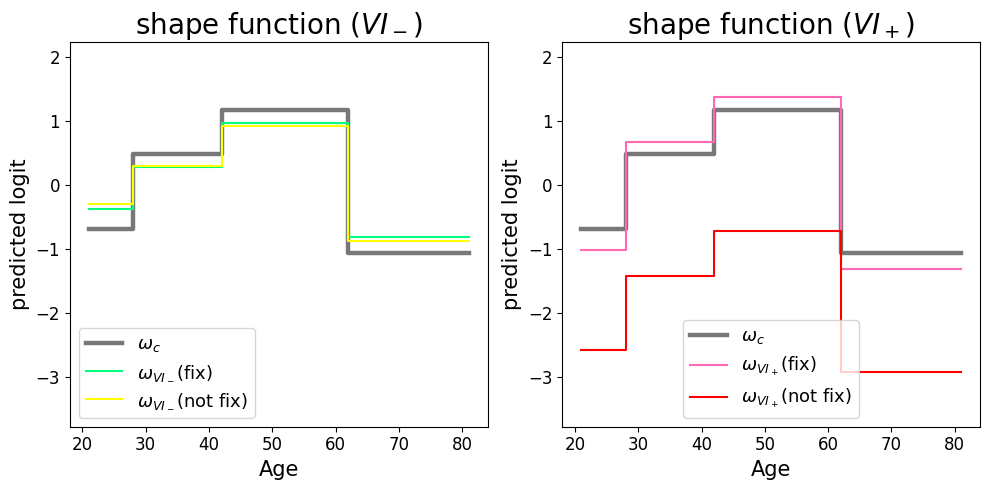

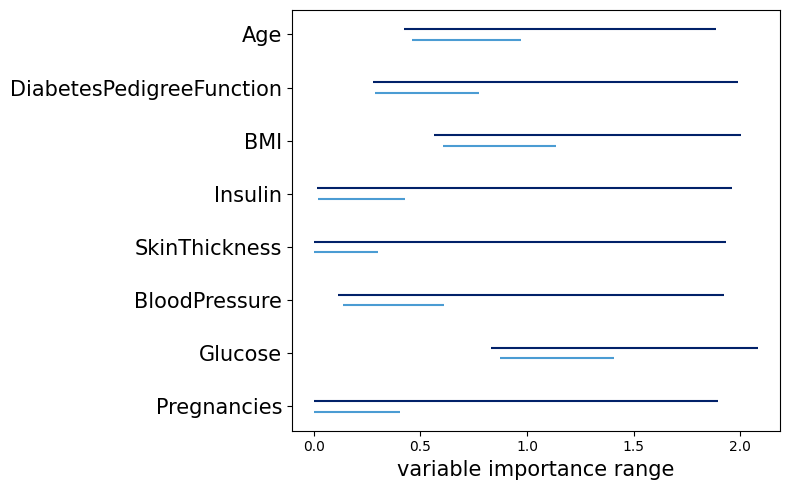

In [ ]:
from src.run_app import variable_importance_range
variable_importance_range(
    filepath,
    mip=False,
    plot_shape=True,
    plot_vir=True
)


In [ ]:
%run /content/GAMsRashomonSet/src/run_app.py



<Figure size 640x480 with 0 Axes>

In [ ]:
import sys
sys.path.append("/content/GAMsRashomonSet")

from src.run_app import get_monotone


# Application 3: get monotonically increasing or decreasing shape function.


(CVXPY) Jan 20 07:16:26 AM: Your problem has 36 variables, 4 constraints, and 0 parameters.
(CVXPY) Jan 20 07:16:26 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:16:26 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:16:26 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:16:26 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:16:26 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:16:26 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:16:26 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:16:26 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:16:26 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:16:26 AM: Applying reduction SCS
(CVXPY) Jan 20 07:16:26 AM: Finished problem compilation (took 2.080e

feature BloodPressure
----------------------monotonicity----------------------
                                     CVXPY                                     
                                     v1.6.7                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 72, constraints m: 40
cones:

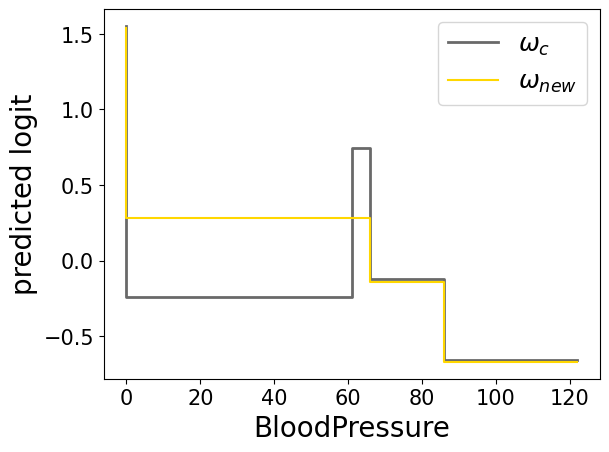

In [ ]:
get_monotone(filepath, f="BloodPressure", direction="decrease")

# Application 4: get user preferred shape functions

(CVXPY) Jan 20 07:18:51 AM: Your problem has 36 variables, 32 constraints, and 0 parameters.
(CVXPY) Jan 20 07:18:51 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 20 07:18:51 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 20 07:18:51 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 20 07:18:51 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 20 07:18:51 AM: Compiling problem (target solver=SCS).
(CVXPY) Jan 20 07:18:51 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 20 07:18:51 AM: Applying reduction Dcp2Cone
(CVXPY) Jan 20 07:18:51 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 20 07:18:51 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 20 07:18:51 AM: Applying reduction SCS
(CVXPY) Jan 20 07:18:51 AM: Finished problem compilation (took 4.016

feature BloodPressure
----------------------projection----------------------
                                     CVXPY                                     
                                     v1.6.7                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 73, constraints m: 106
cones: 

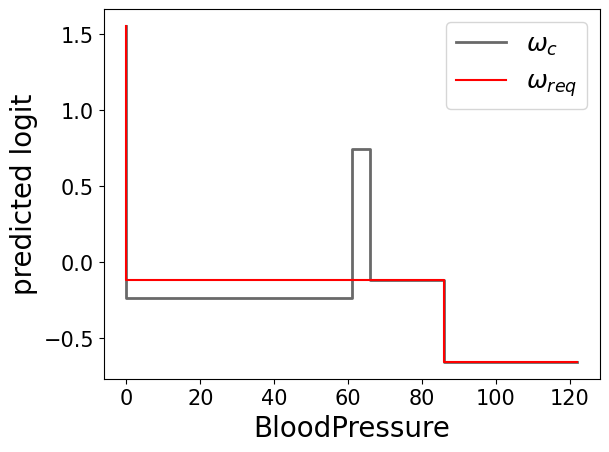

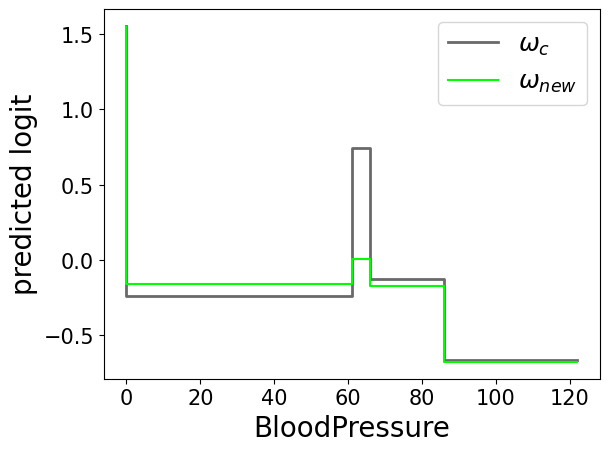

In [ ]:
# w_user = np.array([ 1.55089258, 0.74716894,  0.74716894, -0.12313043, -0.65963492])
w_user = np.array([ 1.55089258, -0.12313043,  -0.12313043, -0.12313043, -0.65963492])
get_projection(filepath, f="BloodPressure", w_user=w_user)

# Application 5: explore the changes in shape functions.

In [ ]:
cnt = test_jump(filepath, n_samples=10000, i=9, j=10, k=11)

proportion: 1.0
